# Capstone Project

* Authors: Jules Mejia
* Instructor name: Hardik
* Date : Friday 21 July 2023
***

## Overview

This project is an opportunity to apply all concepts and techniques I have learned during the Data Analytics Transform Course and apply it using real world data. Through exploratory data analysis and linear regression, this report will generate 5 key insights that will inform an NBA player on what skills he can improve on to secure his next NBA contract.

I chose a data set and business problem centred around the NBA and basketball because I am a long time fan of the game. I have background knowledge both analytically and in application and should serve as an advantage as I understand the nuances of this analysis.

## Business Problem

An up and coming NBA trainer would like to create a training regimen for NBA players, specifically rookies and final year contract players looking to extend their NBA career and get another contract from the 2023-24 NBA season and beyound. 

The aim is to provide insights about their stats in the past season and compare it to the trends of the current NBA play style.

The model generated will be based on prediction, maximising the effect of the co-efficients so that a player can secure the biggest possible contract.

## Exploratory Data Analysis

The data for this project is sourced from [Basketball Reference](https://www.basketball-reference.com/). and [Hoops Hype.](https://hoopshype.com/) Both websites are trusted and reputable sources of NBA statistics and news. The data will be taken from the latest season 2022-23 as it represents the trends in the current NBA landscape. 

[The 2022-23 season](https://www.basketball-reference.com/leagues/NBA_2023_totals.html) Basketball Reference page provides a wide variety of stats for each player such as the basic stats points, rebounds and assists to their shot tendencies. The data collated include:

* Totals
* Per Game
* Advanced
* Play-by-Play
* Shooting
* Adjusted Shooting

The player's salary is web scraped from the page [2022-23 NBA Player Salaries](https://hoopshype.com/salaries/players/2022-2023/) on Hoops Hype.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

import scipy.stats as stats

import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

df = pd.read_csv('data/player_stats_22-23.csv')
df.head()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Unnamed: 0            Player Pos   Age   Tm     G    GS      MP     FG  \
0           0  Precious Achiuwa   C  23.0  TOR  55.0  12.0  1140.0  196.0   
1           1      Steven Adams   C  29.0  MEM  42.0  42.0  1133.0  157.0   
2           2       Bam Adebayo   C  25.0  MIA  75.0  75.0  2598.0  602.0   
3           3      Ochai Agbaji  SG  22.0  UTA  59.0  22.0  1209.0  165.0   
4           4      Santi Aldama  PF  22.0  MEM  77.0  20.0  1682.0  247.0   

      FGA  ...    2P+   3P+   eFG+    FT+    TS+   FTr+  3PAr+  FG Add  \
0   404.0  ...  103.0  74.0   96.0   90.0   95.0  115.0   69.0   -19.6   
1   263.0  ...  109.0   0.0  109.0   47.0   97.0  184.0    1.0    27.2   
2  1114.0  ...  100.0  23.0   99.0  103.0  102.0  135.0    3.0    -9.8   
3   386.0  ...   97.0  98.0   98.0  104.0   96.0   67.0  152.0    -9.9   
4   525.0  ...  108.0  98.0  103.0   96.0  102.0  103.0  131.0    15.5   

   TS Add      Salary  
0   -25.1   2840160.0  
1   -10.7  17926829.0  
2    28.3  30351780.0  
3   -17.0   3918360.0  
4    12.0   2094120.0  

[5 rows x 114 columns]

In [2]:
# Checking columns

df.columns.tolist()

['Unnamed: 0',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'MP_pg',
 'FG_pg',
 'FGA_pg',
 '3P_pg',
 '3PA_pg',
 '2P_pg',
 '2PA_pg',
 'FT_pg',
 'FTA_pg',
 'ORB_pg',
 'DRB_pg',
 'TRB_pg',
 'AST_pg',
 'STL_pg',
 'BLK_pg',
 'TOV_pg',
 'PF_pg',
 'PTS_pg',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'position_estimate_PG%',
 'position_estimate_SG%',
 'position_estimate_SF%',
 'position_estimate_PF%',
 'position_estimate_C%',
 'plusminus_per100_OnCourt',
 'plusminus_per100_On-Off',
 'to_BadPass',
 'to_LostBall',
 'foulcomm_Shoot',
 'foulcomm_Off.',
 'fouldraw_Shoot',
 'fouldraw_Off.',
 'PGA',
 'And1',
 'Avg_Dist_of_FGA',
 '%_of_FGA_by_dist_2P',
 '%_of_FGA_by_dist_0-3',
 '%_of_FGA_by_dis

In [3]:
# Drop unnamed and Player

df = df.drop(['Unnamed: 0', 'Player'], axis=1)

In [4]:
df.head()

Pos   Age   Tm     G    GS      MP     FG     FGA    FG%    3P  ...    2P+  \
0   C  23.0  TOR  55.0  12.0  1140.0  196.0   404.0  0.485  29.0  ...  103.0   
1   C  29.0  MEM  42.0  42.0  1133.0  157.0   263.0  0.597   0.0  ...  109.0   
2   C  25.0  MIA  75.0  75.0  2598.0  602.0  1114.0  0.540   1.0  ...  100.0   
3  SG  22.0  UTA  59.0  22.0  1209.0  165.0   386.0  0.427  81.0  ...   97.0   
4  PF  22.0  MEM  77.0  20.0  1682.0  247.0   525.0  0.470  94.0  ...  108.0   

    3P+   eFG+    FT+    TS+   FTr+  3PAr+  FG Add  TS Add      Salary  
0  74.0   96.0   90.0   95.0  115.0   69.0   -19.6   -25.1   2840160.0  
1   0.0  109.0   47.0   97.0  184.0    1.0    27.2   -10.7  17926829.0  
2  23.0   99.0  103.0  102.0  135.0    3.0    -9.8    28.3  30351780.0  
3  98.0   98.0  104.0   96.0   67.0  152.0    -9.9   -17.0   3918360.0  
4  98.0  103.0   96.0  102.0  103.0  131.0    15.5    12.0   2094120.0  

[5 rows x 112 columns]

The data frame can be split ideologically in to 2 parts. The first half of the columns are generally the counting stats. Counting stats are the basic stats players get during a game. The second half of the columns are the advanced stats. Advanced stats are typically extrapolated from the counting stats or the player's usage in specific parts of the court.

As a first impression, it seems the counting stats have a strong correlation with salary.

## Iteration 1 (Baseline Model)

Now that I am happy with my EDA, I will generate a baseline model. This model will contain all data and no transformations. It will be compared to subsequent iterations to observe the effect of the transformations.

In [5]:
# Checking dtypes before proceeding

non_numeric_columns = []

for column in df.columns:
    if not np.issubdtype(df[column].dtype, np.number):
        non_numeric_columns.append(column)

print(f"Columns {non_numeric_columns} are not a float or an integer.")

Columns ['Pos', 'Tm'] are not a float or an integer.


In [6]:
continuous = [
 'Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'MP_pg',
 'FG_pg',
 'FGA_pg',
 '3P_pg',
 '3PA_pg',
 '2P_pg',
 '2PA_pg',
 'FT_pg',
 'FTA_pg',
 'ORB_pg',
 'DRB_pg',
 'TRB_pg',
 'AST_pg',
 'STL_pg',
 'BLK_pg',
 'TOV_pg',
 'PF_pg',
 'PTS_pg',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'position_estimate_PG%',
 'position_estimate_SG%',
 'position_estimate_SF%',
 'position_estimate_PF%',
 'position_estimate_C%',
 'plusminus_per100_OnCourt',
 'plusminus_per100_On-Off',
 'to_BadPass',
 'to_LostBall',
 'foulcomm_Shoot',
 'foulcomm_Off.',
 'fouldraw_Shoot',
 'fouldraw_Off.',
 'PGA',
 'And1',
 'Avg_Dist_of_FGA',
 '%_of_FGA_by_dist_2P',
 '%_of_FGA_by_dist_0-3',
 '%_of_FGA_by_dist_3-10',
 '%_of_FGA_by_dist_10-16',
 '%_of_FGA_by_dist_16-3P',
 '%_of_FGA_by_dist_3P',
 'FG%_by_dist_2P',
 'FG%_by_dist_0-3',
 'FG%_by_dist_3-10',
 'FG%_by_dist_10-16',
 'FG%_by_dist_16-3P',
 'FG%_by_dist_3P',
 '%_of_FG_astd_2P',
 '%_of_FG_astd_3P',
 '%_of_FGA_isdunk',
 'Made_dunks',
 '%_of_FGA_iscorner3',
 'corner_3P%',
 'Heaves_att',
 'FG+',
 '2P+',
 '3P+',
 'eFG+',
 'FT+',
 'TS+',
 'FTr+',
 '3PAr+',
 'FG Add',
 'TS Add',
 'Salary']

categoricals = ['Pos', 'Tm']

df_cont = df[continuous]

df_cat = df[categoricals]

for col in categoricals:
    df_cat[col] = df[col].astype('category')

# Perform one-hot encoding
df_ohe = pd.get_dummies(df_cat[categoricals], prefix=categoricals, drop_first=True)

df_baseline = pd.concat([df_cont, df_ohe], axis=1)

X = df_baseline.drop('Salary', axis=1)
y = df_baseline['Salary']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<ipython-input-6-f64f6427a023>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = df[col].astype('category')
<ipython-input-6-f64f6427a023>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = df[col].astype('category')
C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     9.805
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           3.99e-72
Time:                        20:48:53   Log-Likelihood:                -9037.1
No. Observations:                 537   AIC:                         1.836e+04
Df Residuals:                     394   BIC:                         1.897e+04
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.943e+07   6.25e+07     -0.631      0.529   -1.62e+08    8.35e+07
Age                       5.986e+05   7.97e+04      7.514      0.000    4.42e+05    7.55e+05
G                         1.221e+04   4.67e+04      0.261      0.794   -7.97e+04    1.04e+05
GS                        6.206e+04   2.87e+04      2.159      0.031    5551.141    1.19e+05
MP                        -1.08e+04   6142.137     -1.758      0.079   -2.29e+04    1274.915
FG                        5.237e+05   5.74e+06      0.091      0.927   -1.08e+07    1.18e+07
FGA                       3.563e+06   1.11e+07      0.320      0.749   -1.83e+07    2.54e+07
FG%                      -9.903e+07    2.2e+08     -0.451      0.652   -5.31e+08    3.33e+08
3P                        4.724e+05   4.59e+06      0.103      0.918   -8.55e+06     9.5e+06
3PA                       1.754e+06   5.56e+06      0.316      0.753   -9.17e+06    1.27e+07
3P%                      -8.857e+07   1.42e+08     -0.624      0.533   -3.67e+08     1.9e+08
2P                        5.138e+04   1.15e+06      0.045      0.964   -2.21e+06    2.31e+06
2PA                        1.81e+06   5.56e+06      0.325      0.745   -9.12e+06    1.27e+07
2P%                       -2.52e+08   9.24e+07     -2.727      0.007   -4.34e+08   -7.03e+07
eFG%                      1.402e+08    1.9e+08      0.737      0.461   -2.34e+08    5.14e+08
FT                       -6.017e+06   6.97e+06     -0.863      0.389   -1.97e+07    7.69e+06
FTA                       5.365e+06   5.25e+06      1.021      0.308   -4.96e+06    1.57e+07
FT%                       1.851e+08   1.28e+08      1.446      0.149   -6.65e+07    4.37e+08
ORB                        1.32e+04   3.02e+04      0.437      0.662   -4.61e+04    7.25e+04
DRB                      -5905.3885   2.19e+04     -0.270      0.787   -4.89e+04    3.71e+04
TRB                       7295.4937   1.41e+04      0.518      0.604   -2.04e+04     3.5e+04
AST                       4.166e+04   6.69e+04      0.623      0.534   -8.99e+04    1.73e+05
STL                      -6354.4560   5.24e+04     -0.121      0.904   -1.09e+05    9.67e+04
BLK                      -5.159e+04   5.58e+04     -0.925      0.356   -1.61e+05    5.81e+04
TOV                      -3.017e+05    9.6e+04     -3.144      0.002    -4.9e+05   -1.13e+05
PF                        9545.4359   3.73e+04      0.256      0.798   -6.38e+04    8.29e+04
PTS                      -4.497e+06   1.15e+07     -0.390      0.697   -2.72e+07    1.82e+07
MP_pg                     3.106e+05      4e+05      0.777      0.437   -4.75e+05     1.1e+06
FG_pg                      2.33e+05   9.51e+06      0.024      0.980   -1.85e+07    1.89e+07
FGA_pg                   -2.943e+06   6.08e+06     -0.484      0.629   -1.49e+07    9.01e+06
3P_pg         

In [7]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table with positive values
print(coef_df_sorted)

                                  coef       std err      t  P>|t|  \
FTr                       4.355000e+08  3.470000e+08  1.256  0.210   
FT%                       1.851000e+08  1.280000e+08  1.446  0.149   
eFG%                      1.402000e+08  1.900000e+08  0.737  0.461   
%_of_FGA_by_dist_2P       1.365000e+08  4.270000e+08  0.320  0.749   
TS%                       4.393000e+07  1.770000e+08  0.249  0.804   
position_estimate_SF%     2.909000e+07  6.260000e+07  0.465  0.642   
position_estimate_C%      2.790000e+07  6.250000e+07  0.446  0.656   
position_estimate_SG%     2.724000e+07  6.270000e+07  0.435  0.664   
position_estimate_PF%     2.550000e+07  6.250000e+07  0.408  0.684   
WS/48                     2.334000e+07  3.630000e+07  0.644  0.520   
position_estimate_PG%     2.176000e+07  6.280000e+07  0.347  0.729   
DWS                       1.357000e+07  6.230000e+06  2.176  0.030   
OWS                       1.056000e+07  6.210000e+06  1.702  0.090   
TS Add              

In [8]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.05)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

                       coef     std err      t  P>|t|        [0.025  \
Age                598600.0     79700.0  7.514  0.000  4.420000e+05   
to_BadPass         305700.0     71500.0  4.274  0.000  1.650000e+05   
foulcomm_Off.      390800.0     99900.0  3.914  0.000  1.940000e+05   
TOV               -301700.0     96000.0 -3.144  0.002 -4.900000e+05   
And1              -271000.0     89200.0 -3.040  0.003 -4.460000e+05   
2P%            -252000000.0  92400000.0 -2.727  0.007 -4.340000e+08   
FG%_by_dist_2P -252000000.0  92400000.0 -2.727  0.007 -4.340000e+08   
2P+               2739000.0   1010000.0  2.715  0.007  7.560000e+05   
DWS              13570000.0   6230000.0  2.176  0.030  1.310000e+06   
GS                  62060.0     28700.0  2.159  0.031  5.551141e+03   
PER              -1388000.0    691000.0 -2.007  0.045 -2.750000e+06   
Pos_PG            7431000.0   3740000.0  1.987  0.048  7.780000e+04   
TRB%              7713000.0   3920000.0  1.967  0.050  4.541549e+03   

     

### Iteration 1 Model Comments

Looking at the categorical variables first, what position a person plays or what team the person plays for has no statistical significance on salary. While there are some large co-efficients especially in the PG/SG positions, this is more of an indication that the top paid players are at those positions which is reflective of the NBA. 

Skew = 0.651 indicates the model is positively skewed but is not heavily skewed as it is close to 0

Kurtosis = 4.599 indicates this is a leptokurtic curve. It is initially quite close to a mesokurtic curve so there may only be some outliers in the data set

There are many co-efficients that lead have a big effect on salary. In contrast to statistical significance, the list of variables has been drastically reduced. Looking at the list of statistically significant variables, it does not match well with what happens in reality. In reality, turnovers after a bad pass and committing offensive fouls are not positive skills to have as an NBA player. This indicates that there could be a lot of variance in the variables and requires investigating. 

This project is focused on maximising the effect of variables with salary so I will focus on the co-efficients list and include the statistically significant list (if it has not been included in the co-efficients list already). 

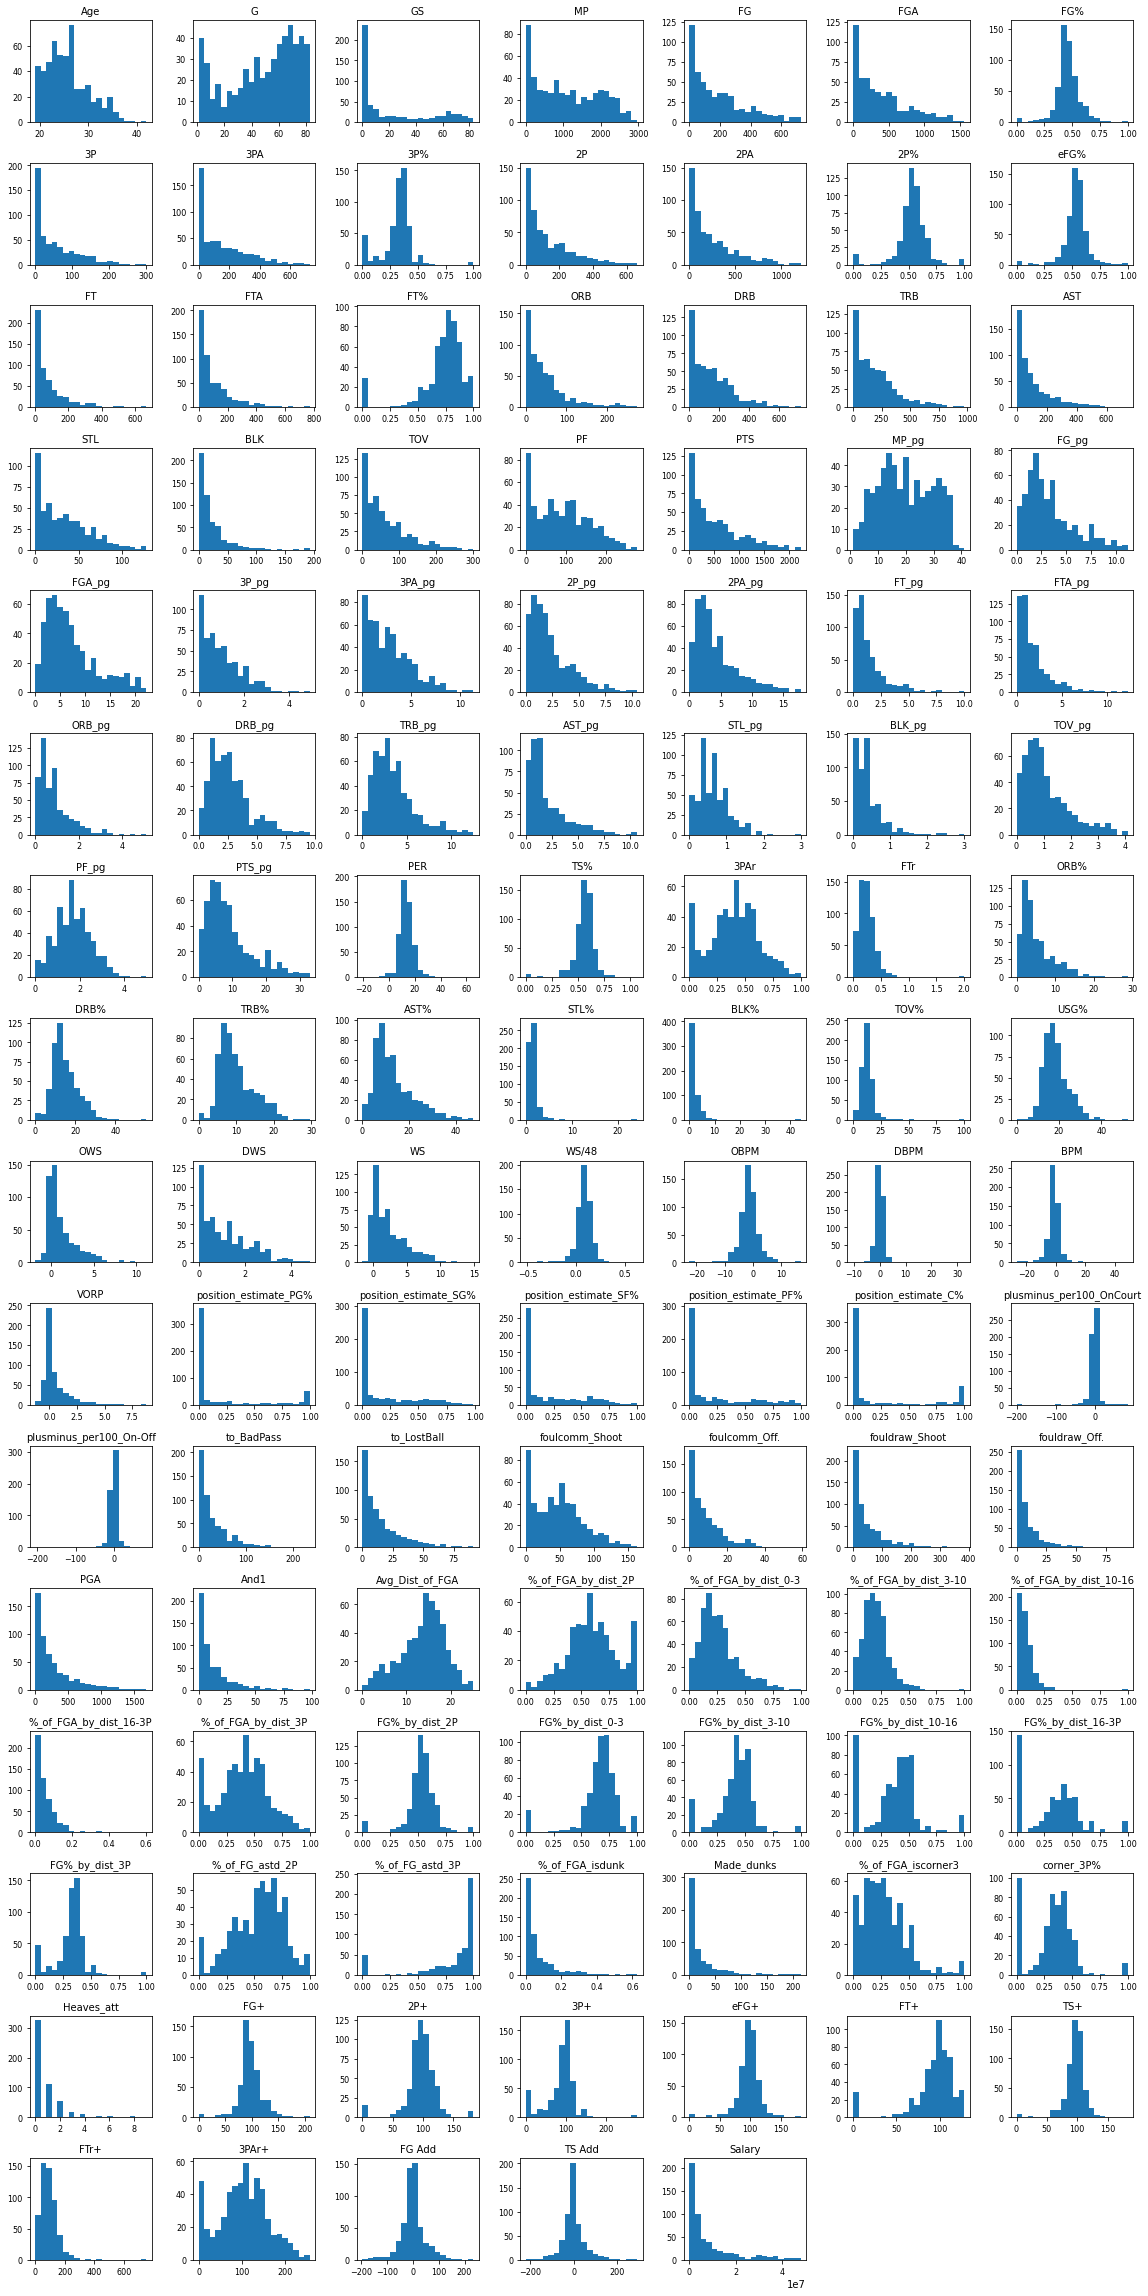

In [9]:
# Check distributions

# Calculate the number of rows and columns required to accommodate all the continuous columns
num_columns = len(continuous)
num_rows = math.ceil(num_columns / 7)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a histogram
for i, column in enumerate(continuous):
    # Plot histogram on the corresponding subplot
    ax = axes[i // 7, i % 7]
    ax.hist(df_baseline[column], bins=20)
    ax.set_title(column, fontsize=10)
    ax.tick_params(labelsize=8)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Distribution Comments

A majority of variables are either normally distributed or positively skewed. It is understandable there is skew because a majority of players would produce stats on the lower end whereas the limited amount of 'star' players would contribute on the higher end. This insight also lines up with the skewness and kurtosis specified in the model produced.

Interesting to note that the percentage that a player plays at each position has no real shape. I believe this is reflective of the play style of the current NBA. Teams are trending towards positionless players or players that can play multiple positions. The shape of the distribute indicates players definitely don't play that position or play multiple positions. As per the baseline model, these variables are also highly statistically insignificant so these will be dropped in the next iteration.

### Verify the Linearity Assumption

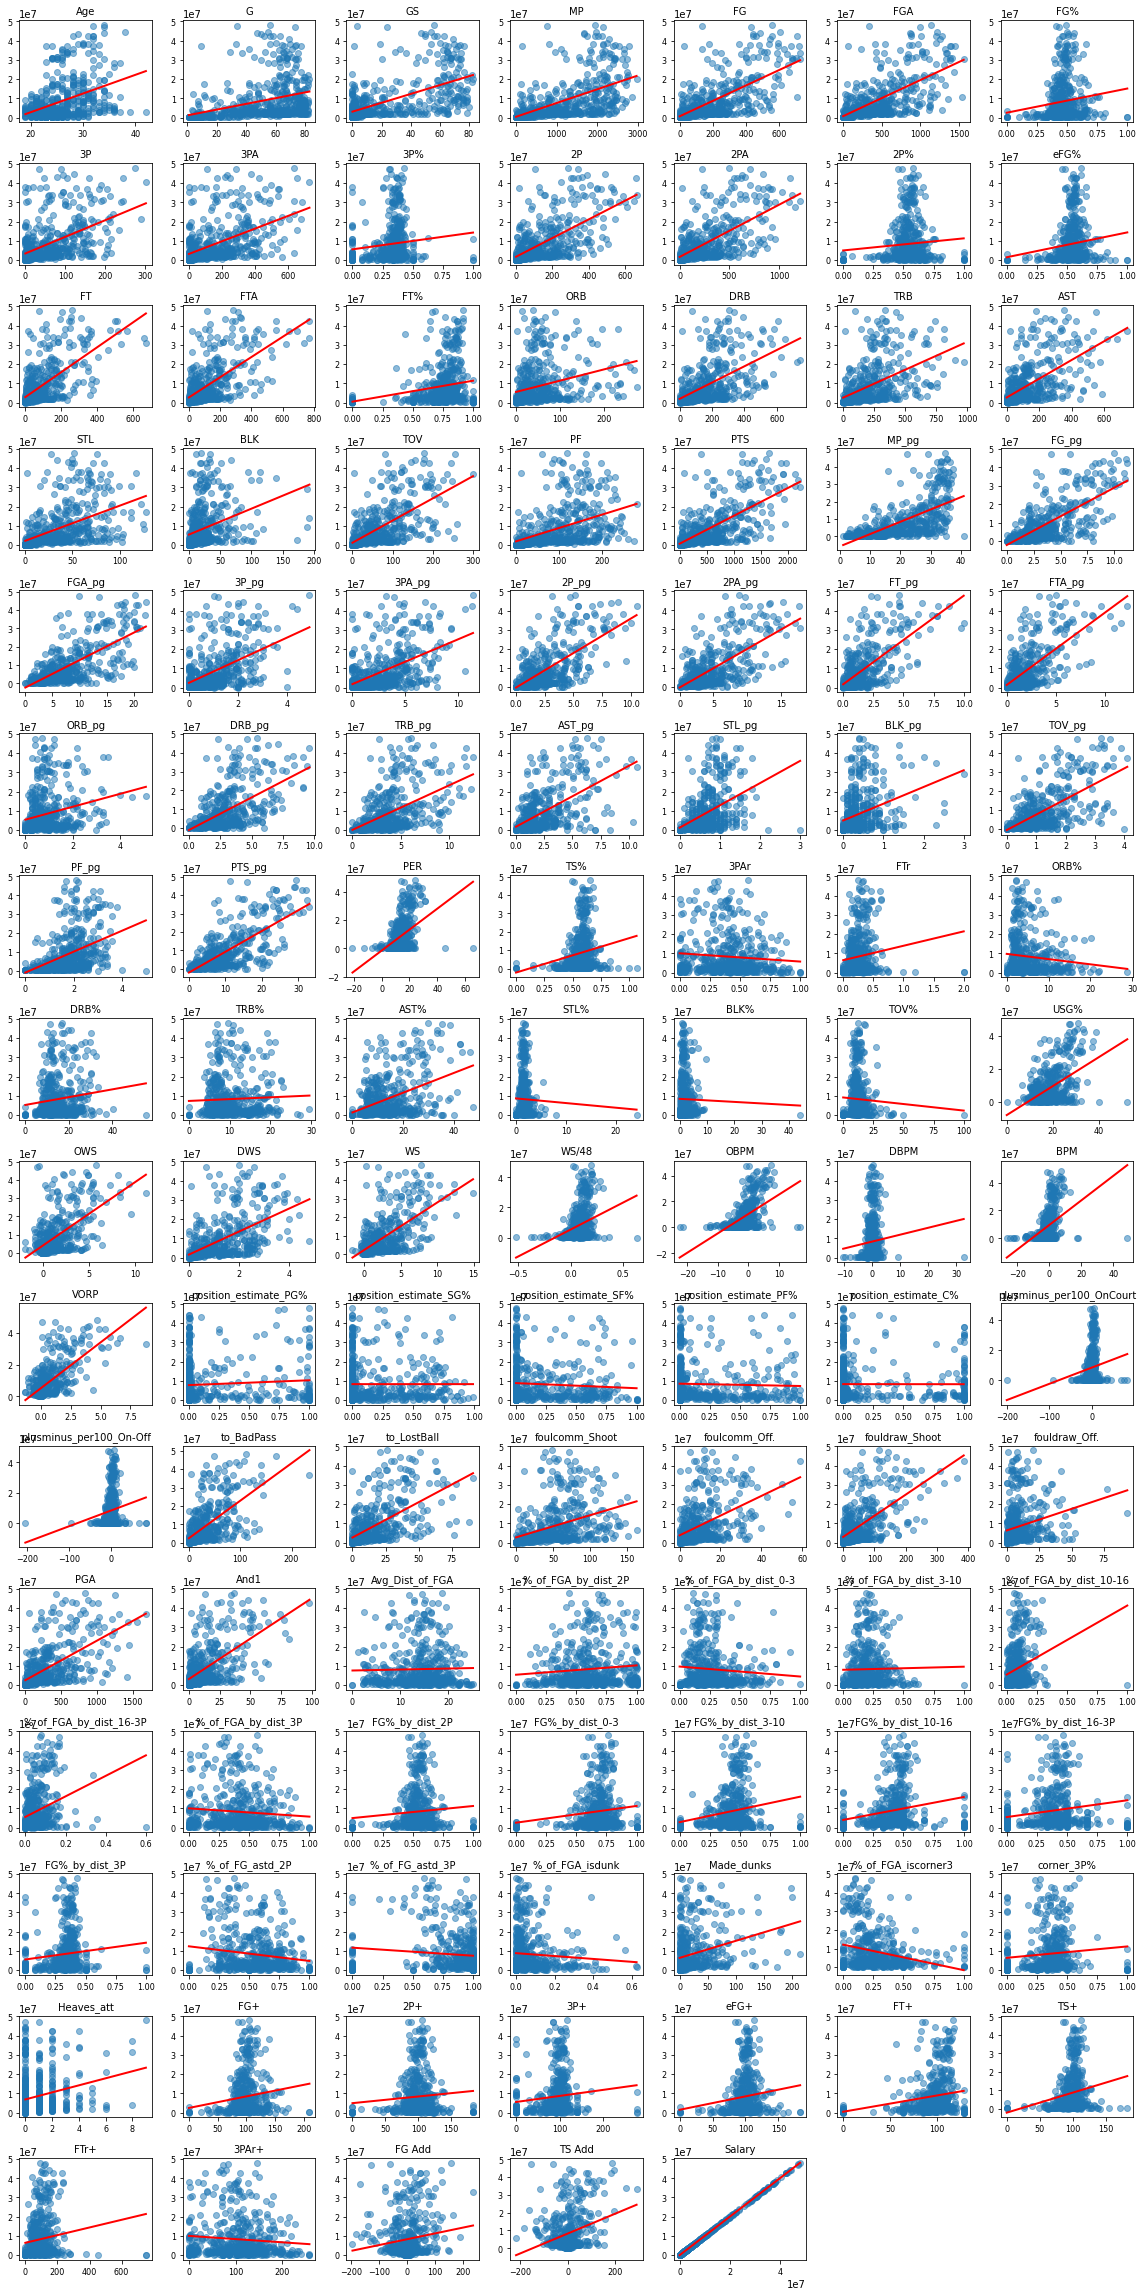

In [10]:
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a scatter plot with regression line
for i, column in enumerate(continuous):
    # Plot scatter plot on the corresponding subplot
    ax = axes[i // 7, i % 7]
    ax.scatter(df_baseline[column], df_baseline['Salary'], alpha=0.5)
    ax.set_title(column, fontsize=10)
    ax.tick_params(labelsize=8)

    # Fit a linear regression model
    model = LinearRegression()
    X = df_baseline[column].values.reshape(-1, 1)
    y = df_baseline['Salary']
    model.fit(X, y)
    X_new = np.array([[df_baseline[column].min()], [df_baseline[column].max()]])
    preds = model.predict(X_new)

    # Plot the regression line
    ax.plot(X_new, preds, c='red', linewidth=2)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Verify the Homoscedasticity Assumption

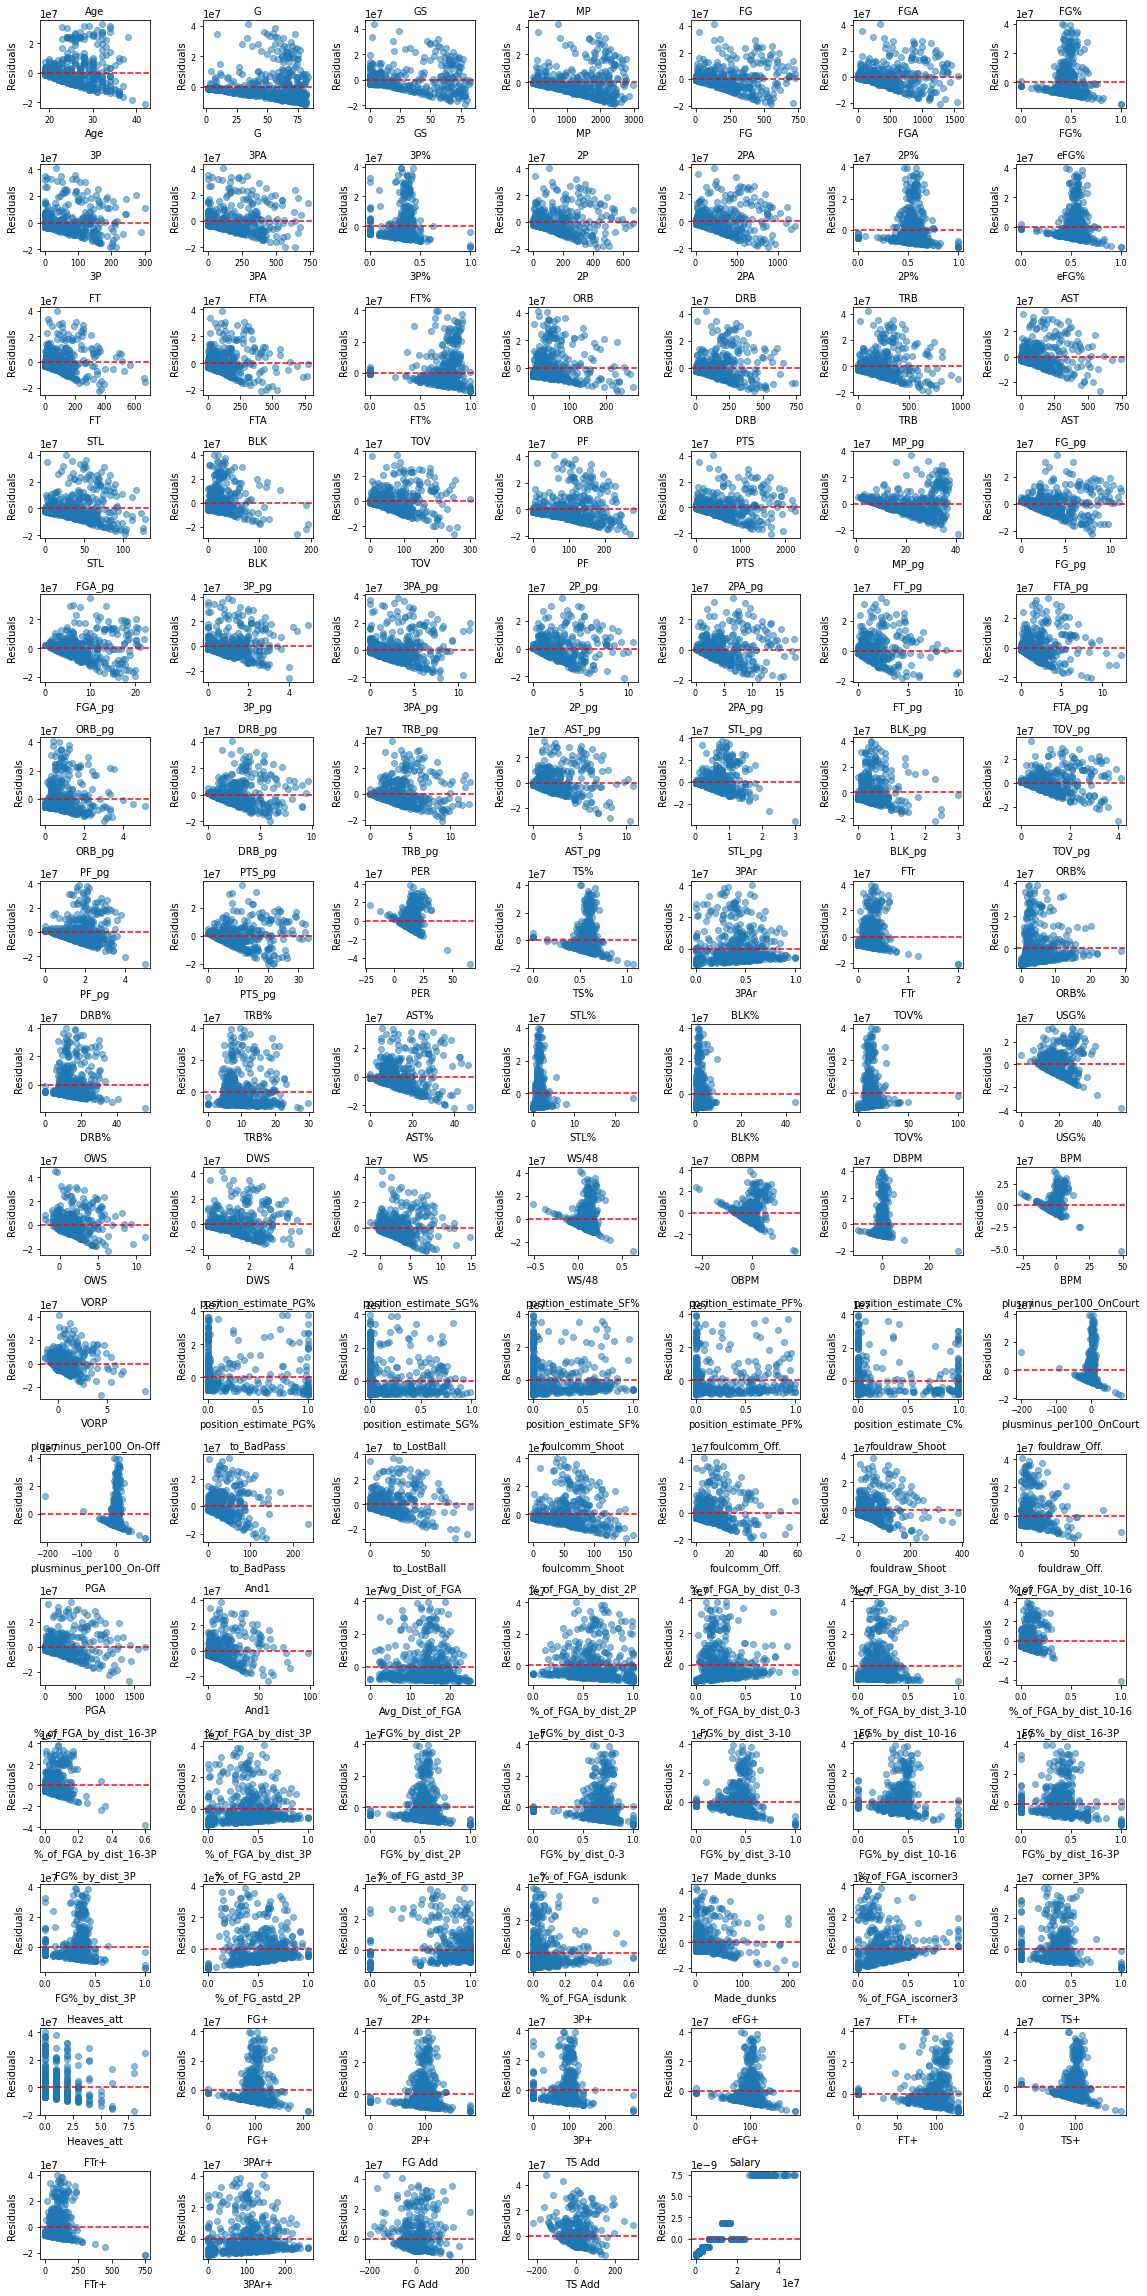

In [11]:
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a residuals versus exog plot
for i, column in enumerate(continuous):
    # Plot residuals versus exog on the corresponding subplot
    ax = axes[i // 7, i % 7]
    X = df_baseline[column].values.reshape(-1, 1)
    y = df_baseline['Salary']
    model.fit(X, y)
    preds = model.predict(X)
    residuals = y - preds
    ax.scatter(X, residuals, alpha=0.5)
    ax.set_title(column, fontsize=10)
    ax.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
    ax.tick_params(labelsize=8)
    ax.set_xlabel(column)
    ax.set_ylabel('Residuals')

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Verify the Normality Assumption

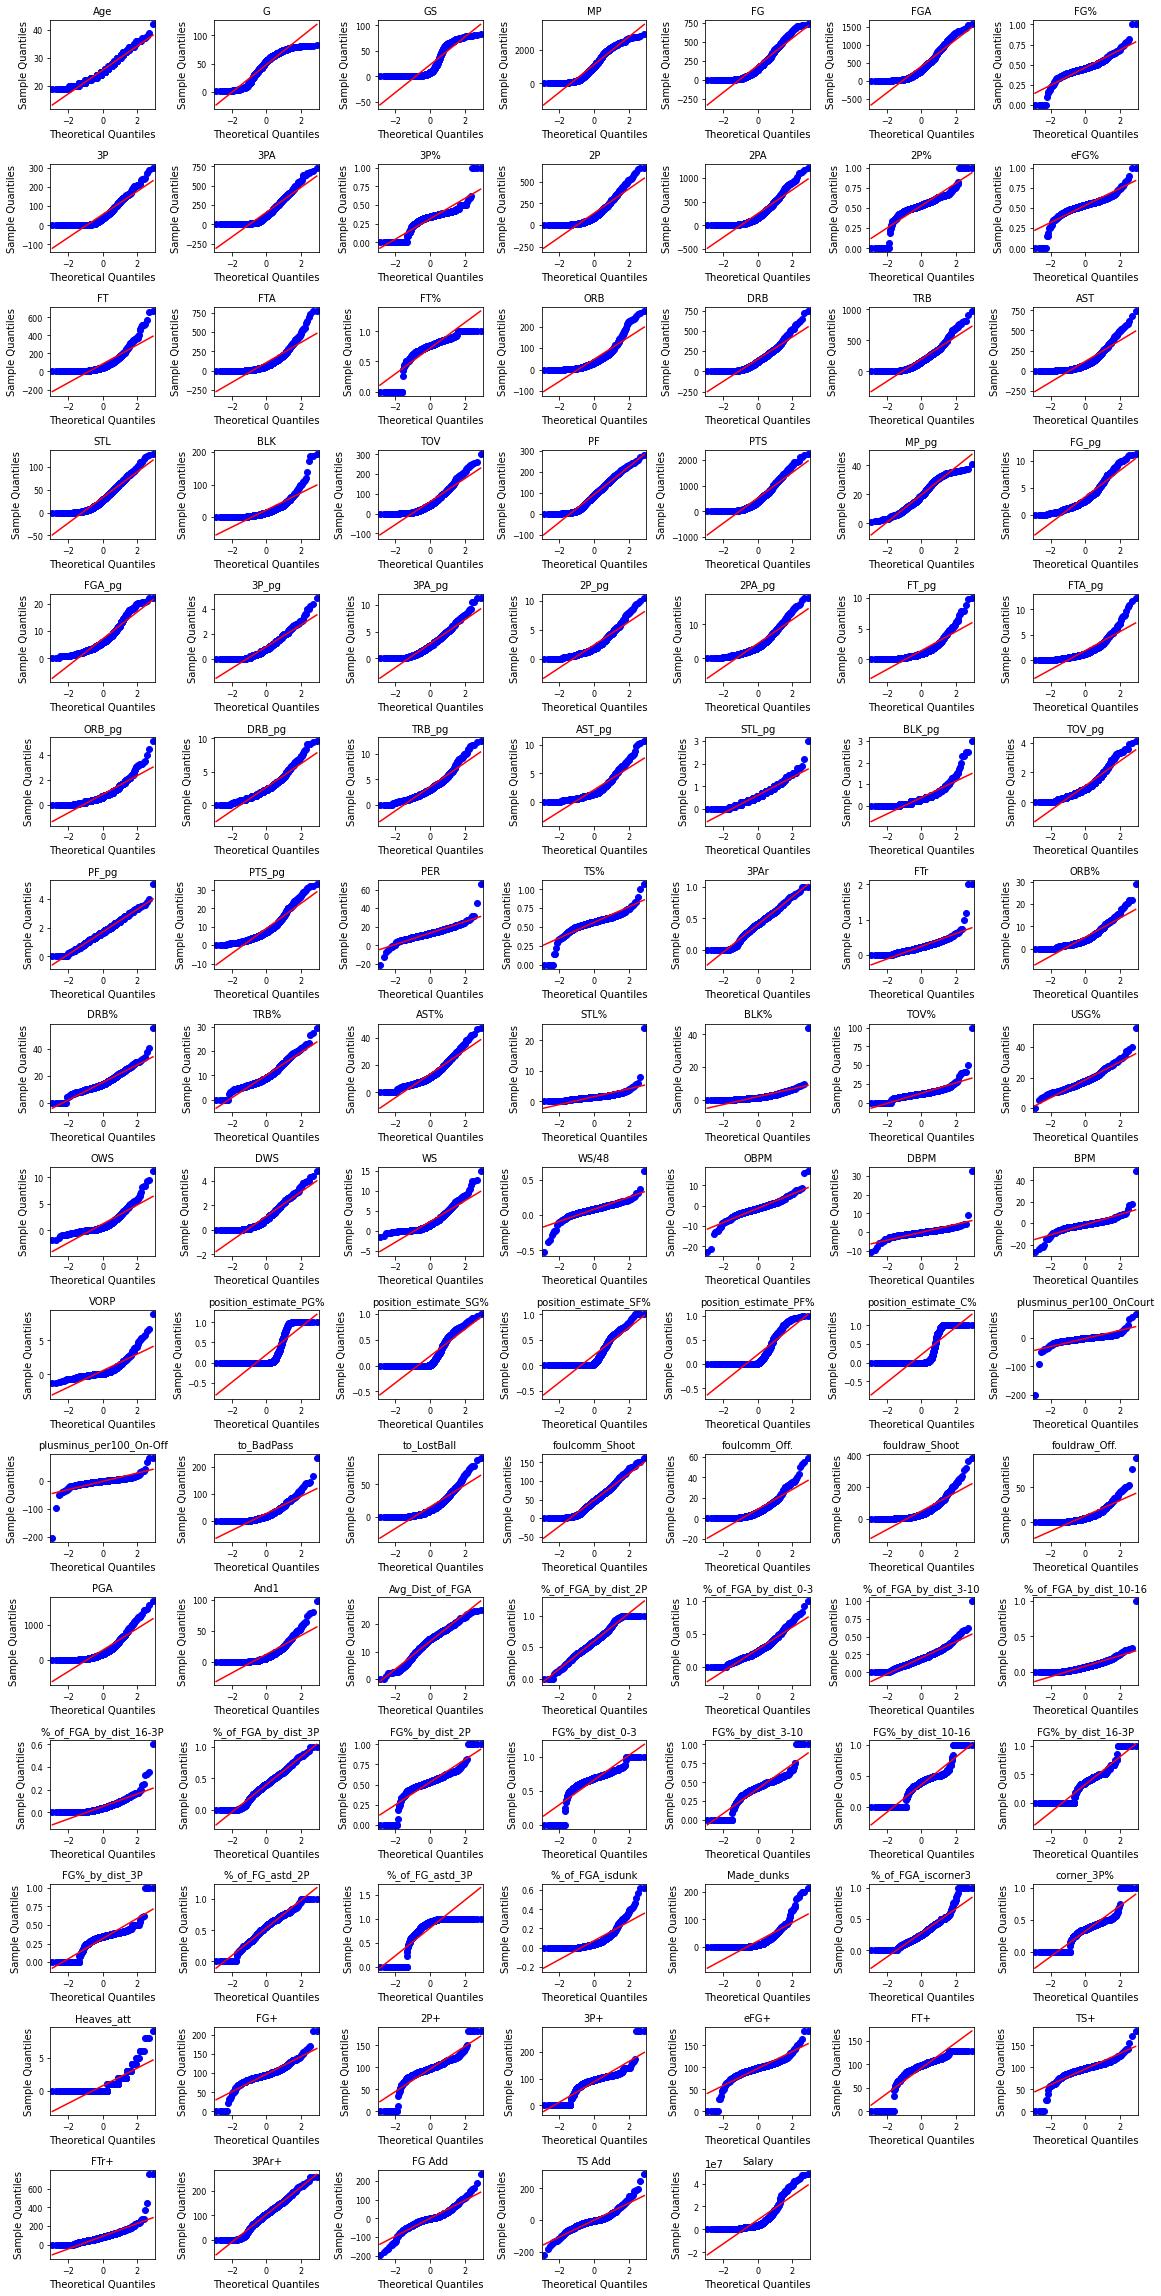

In [12]:
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a Q-Q plot
for i, column in enumerate(continuous):
    # Plot Q-Q plot on the corresponding subplot
    ax = axes[i // 7, i % 7]
    sm.qqplot(df_baseline[column], line='s', ax=ax)
    ax.set_title(column, fontsize=10)
    ax.tick_params(labelsize=8)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Assumption Comments

I want to identify variables that have a weak or no relationship with salary. They will be dropped for iteration 2

#### Linearity

Heaves attempted appears to be categorical data, not continuous.

Variables with a negative or no relationship with salary:
* 3PAr
* ORB%
* STL%
* BLK%
* TOV%
* Position_estimate_SG%
* Position_estimate_SF%
* Position_estimate_PF%
* Position_estimate_C%
* Avg_Dist_of_FGA
* %_of_FGA_by_dist_0-3
* %_of_FGA_by_dist_3-10
* %_of_FG_asstd_2P
* %_of_FG_asstd_3P
* %_of_FGA_isdunk
* %_of_FGA_iscorner3
* 3PAr+

What is very interesting here is that it does not matter where a player takes most of their shots. What matters more is that the player has a high FG% in those areas.

#### Homoscedasticity 

All variables display heteroscedasticity. Since many of the variables display a normal distribution and linear relationship so far, I will observe the effect of applying transformations.

#### Normality

All variables experience heavy tails in the Q-Q plot indicating outliers and skewness.


## Iteration 2

Iteration 2 will focus on applying transformations and addressing outliers. It was seen in iteration 1 that many variables were not stastically significant however there were many variables that had a large effect on salary. By applying transforamtions, I expect some positive value co-efficients to show statistical significance.

The categorical variables pos (position) and tm (team player plays for) will be dropped. A majority of tm variables have shown to not be statistically significant and negative co-efficients. While pos has large co-efficients, it is more of a reflection of how many more higher paid players are at each position. Also, players cannot simply change position in order to get a higher salary. For example, a power forward moving to the point guard position.

Before beginning iteration 2, variables Age, G, GS, MP, MP_pg and heaves_att will be dropped.

It is out of the player's control to change their age, how many games they play and/or start and how many minutes they play. heaves_att is categorical.

In [13]:
# Drop age, heaves_att and salary
# Age not relevant and heaves_att is categorical

continuous_ite2 = [
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'FG_pg',
 'FGA_pg',
 '3P_pg',
 '3PA_pg',
 '2P_pg',
 '2PA_pg',
 'FT_pg',
 'FTA_pg',
 'ORB_pg',
 'DRB_pg',
 'TRB_pg',
 'AST_pg',
 'STL_pg',
 'BLK_pg',
 'TOV_pg',
 'PF_pg',
 'PTS_pg',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'position_estimate_PG%',
 'position_estimate_SG%',
 'position_estimate_SF%',
 'position_estimate_PF%',
 'position_estimate_C%',
 'plusminus_per100_OnCourt',
 'plusminus_per100_On-Off',
 'to_BadPass',
 'to_LostBall',
 'foulcomm_Shoot',
 'foulcomm_Off.',
 'fouldraw_Shoot',
 'fouldraw_Off.',
 'PGA',
 'And1',
 'Avg_Dist_of_FGA',
 '%_of_FGA_by_dist_2P',
 '%_of_FGA_by_dist_0-3',
 '%_of_FGA_by_dist_3-10',
 '%_of_FGA_by_dist_10-16',
 '%_of_FGA_by_dist_16-3P',
 '%_of_FGA_by_dist_3P',
 'FG%_by_dist_2P',
 'FG%_by_dist_0-3',
 'FG%_by_dist_3-10',
 'FG%_by_dist_10-16',
 'FG%_by_dist_16-3P',
 'FG%_by_dist_3P',
 '%_of_FG_astd_2P',
 '%_of_FG_astd_3P',
 '%_of_FGA_isdunk',
 'Made_dunks',
 '%_of_FGA_iscorner3',
 'corner_3P%',
 'FG+',
 '2P+',
 '3P+',
 'eFG+',
 'FT+',
 'TS+',
 'FTr+',
 '3PAr+',
 'FG Add',
 'TS Add',
 'Salary']

In [14]:
# Reduce by 3 standard deviations

df_ite2 = df[~df[continuous_ite2].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 112 entries, Pos to Salary
dtypes: float64(110), object(2)
memory usage: 470.0+ KB


In [16]:
# Checking entries have reduced

df_ite2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 535
Columns: 112 entries, Pos to Salary
dtypes: float64(110), object(2)
memory usage: 320.5+ KB


In [17]:
# Check for NaN values

na_counts = df_ite2.isna().sum()
columns_with_na = df_ite2.columns[na_counts > 0].tolist()

if len(columns_with_na) == 0:
    print("No NaN values in dataframe")
else:
    for column in columns_with_na:
        print(f"{column}: {na_counts[column]}")

No NaN values in dataframe


### Check for Multicollinearity

In [18]:
df_ite2_preprocessed = df_ite2.loc[:, continuous]
df_ite2_preprocessed.head()

Age     G    GS      MP     FG    FGA    FG%     3P    3PA    3P%     2P  \
0  23.0  55.0  12.0  1140.0  196.0  404.0  0.485   29.0  108.0  0.269  167.0   
3  22.0  59.0  22.0  1209.0  165.0  386.0  0.427   81.0  228.0  0.355   84.0   
4  22.0  77.0  20.0  1682.0  247.0  525.0  0.470   94.0  266.0  0.353  153.0   
5  24.0  59.0   3.0   884.0  131.0  295.0  0.444   61.0  159.0  0.384   70.0   
6  27.0  72.0  70.0  1972.0  245.0  557.0  0.440  146.0  366.0  0.399   99.0   

     2PA    2P%   eFG%     FT    FTA    FT%    ORB    DRB    TRB    AST   STL  \
0  296.0  0.564  0.521   87.0  124.0  0.702  100.0  228.0  328.0   50.0  31.0   
3  158.0  0.532  0.532   56.0   69.0  0.812   43.0   78.0  121.0   67.0  16.0   
4  259.0  0.591  0.560  108.0  144.0  0.750   85.0  286.0  371.0   97.0  45.0   
5  136.0  0.515  0.547   40.0   60.0  0.667   15.0   86.0  101.0  108.0  32.0   
6  191.0  0.518  0.571  114.0  126.0  0.905   61.0  176.0  237.0  163.0  62.0   

    BLK   TOV     PF    PTS  MP_pg  FG_pg  FGA_pg  3P_pg  3PA_pg  2P_pg  \
0  30.0  59.0  102.0  508.0   20.7    3.6     7.3    0.5     2.0    3.0   
3  15.0  41.0   99.0  467.0   20.5    2.8     6.5    1.4     3.9    1.4   
4  48.0  60.0  143.0  696.0   21.8    3.2     6.8    1.2     3.5    2.0   
5  21.0  55.0   88.0  363.0   15.0    2.2     5.0    1.0     2.7    1.2   
6  14.0  72.0  117.0  750.0   27.4    3.4     7.7    2.0     5.1    1.4   

   2PA_pg  FT_pg  FTA_pg  ORB_pg  DRB_pg  TRB_pg  AST_pg  STL_pg  BLK_pg  \
0     5.4    1.6     2.3     1.8     4.1     6.0     0.9     0.6     0.5   
3     2.7    0.9     1.2     0.7     1.3     2.1     1.1     0.3     0.3   
4     3.4    1.4     1.9     1.1     3.7     4.8     1.3     0.6     0.6   
5     2.3    0.7     1.0     0.3     1.5     1.7     1.8     0.5     0.4   
6     2.7    1.6     1.8     0.8     2.4     3.3     2.3     0.9     0.2   

   TOV_pg  PF_pg  PTS_pg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
0     1.1    1.9     9.2  15.2  0.554  0.267  0.307   9.3  24.4  16.3   6.3   
3     0.7    1.7     7.9   9.5  0.561  0.591  0.179   3.9   6.9   5.4   7.5   
4     0.8    1.9     9.0  13.9  0.591  0.507  0.274   5.4  18.0  11.7   7.6   
5     0.9    1.5     6.2  11.6  0.565  0.539  0.203   1.9  10.5   6.3  16.7   
6     1.0    1.6    10.4  12.3  0.612  0.657  0.226   3.4   9.0   6.3  10.9   

   STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  \
0   1.3   2.6  11.4  19.4  0.8  1.4  2.2  0.093  -1.4  -0.8 -2.3  -0.1   
3   0.6   1.0   9.0  15.8  0.9  0.4  1.3  0.053  -1.7  -1.4 -3.0  -0.3   
4   1.3   2.6   9.3  16.0  2.1  2.4  4.6  0.130  -0.3   0.8  0.5   1.1   
5   1.7   2.0  14.6  17.9  0.3  0.8  1.1  0.062  -1.4   0.4 -0.9   0.2   
6   1.5   0.6  10.5  14.6  2.8  2.2  5.1  0.123  -0.6   0.7  0.1   1.0   

   position_estimate_PG%  position_estimate_SG%  position_estimate_SF%  \
0                   0.00                   0.00                   0.00   
3                   0.38                   0.40                   0.20   
4                   0.00                   0.00                   0.02   
5                   0.02                   0.39                   0.51   
6                   0.05                   0.75                   0.21   

   position_estimate_PF%  position_estimate_C%  plusminus_per100_OnCourt  \
0                   0.17                  0.83                      -1.5   
3                   0.03                  0.00                      -0.5   
4                   0.69                  0.29                       2.2   
5                   0.08                  0.00                      -2.5   
6                   0.00                  0.00                       5.7   

   plusminus_per100_On-Off  to_BadPass  to_LostBall  foulcomm_Shoot  \
0                     -3.8         8.0         21.0            53.0   
3                      0.9        15.0          8.0            65.0   
4                     -2.4        19.0         20.0            93.0   
5                     

In [19]:
# No scatter matrix, too many variables

df_ite2_preprocessed.corr()

Age         G        GS        MP        FG  \
Age                       1.000000  0.026159  0.029530  0.046817  0.001825   
G                         0.026159  1.000000  0.552395  0.856914  0.721494   
GS                        0.029530  0.552395  1.000000  0.833596  0.796109   
MP                        0.046817  0.856914  0.833596  1.000000  0.917078   
FG                        0.001825  0.721494  0.796109  0.917078  1.000000   
FGA                       0.005538  0.728712  0.793728  0.925704  0.990269   
FG%                       0.042338  0.104814  0.095779  0.087455  0.167870   
3P                        0.103314  0.678021  0.687659  0.837442  0.812273   
3PA                       0.083421  0.699378  0.701950  0.857404  0.830966   
3P%                       0.109755  0.262021  0.211257  0.314457  0.281293   
2P                       -0.053487  0.634584  0.733008  0.819827  0.948664   
2PA                      -0.054221  0.635003  0.736886  0.830125  0.953219   
2P%                       0.033312  0.036195  0.021533  0.013030  0.042197   
eFG%                      0.173841  0.231611  0.159610  0.212531  0.218599   
FT                        0.000828  0.558902  0.665171  0.756831  0.864666   
FTA                      -0.015284  0.576211  0.666278  0.762814  0.866091   
FT%                       0.106020  0.127514  0.174053  0.216241  0.235741   
ORB                      -0.068060  0.595510  0.503004  0.594007  0.548627   
DRB                       0.032509  0.740832  0.720610  0.850956  0.815407   
TRB                       0.007215  0.736481  0.696055  0.821965  0.782146   
AST                       0.114393  0.598272  0.638336  0.772589  0.758061   
STL                       0.011759  0.741613  0.671979  0.844083  0.739216   
BLK                      -0.025918  0.538644  0.522311  0.558585  0.514166   
TOV                       0.012570  0.681999  0.719384  0.848035  0.891794   
PF                        0.015706  0.819856  0.710625  0.874182  0.771124   
PTS                       0.016050  0.718467  0.792998  0.918184  0.994092   
MP_pg                     0.069052  0.579519  0.822165  0.879331  0.854520   
FG_pg                     0.001044  0.436757  0.720438  0.739105  0.901320   
FGA_pg                    0.000517  0.430854  0.712849  0.740491  0.884187   
3P_pg                     0.131774  0.435276  0.590575  0.666720  0.691864   
3PA_pg                    0.104755  0.414931  0.594395  0.662380  0.691884   
2P_pg                    -0.068896  0.338321  0.626864  0.609791  0.809685   
2PA_pg                   -0.076191  0.339879  0.630241  0.621648  0.815423   
FT_pg                    -0.002413  0.315141  0.567290  0.578550  0.741912   
FTA_pg                   -0.023089  0.301812  0.557919  0.562763  0.727247   
ORB_pg                   -0.072355  0.212596  0.316932  0.282368  0.297146   
DRB_pg                    0.035982  0.423407  0.620261  0.634043  0.663668   
TRB_pg                    0.005687  0.394239  0.579390  0.579099  0.606032   
AST_pg                    0.125011  0.281722  0.496450  0.536435  0.568998   
STL_pg                    0.017816  0.419462  0.545700  0.616773  0.558074   
BLK_pg                   -0.032161  0.204916  0.345083  0.284155  0.288738   
TOV_pg                    0.002252  0.319936  0.563026  0.577181  0.686561   
PF_pg                     0.038599  0.380951  0.562492  0.573551  0.541908   
PTS_pg                    0.020404  0.442808  0.719856  0.746930  0.900157   
PER                       0.041250  0.156859  0.260262  0.267048  0.459677   
TS%                       0.167172  0.247386  0.199634  0.254800  0.277682   
3PAr                      0.153932  0.090147  0.007677  0.079760 -0.053004   
FTr                      -0.041230 -0.072956 -0.020679 -0.058501  0.015060   
ORB%                     -0.073774 -0.140152 -0.157741 -0.235120 -0.193235   
DRB%                      0.006432 -0.031111 -0.013403 -0.056874  0.008546   
TRB%                     -0.024172 -0.081639 -0.07853

In [20]:
abs(df_ite2_preprocessed.corr()) > 0.75

Age      G     GS     MP     FG    FGA    FG%  \
Age                        True  False  False  False  False  False  False   
G                         False   True  False   True  False  False  False   
GS                        False  False   True   True   True   True  False   
MP                        False   True   True   True   True   True  False   
FG                        False  False   True   True   True   True  False   
FGA                       False  False   True   True   True   True  False   
FG%                       False  False  False  False  False  False   True   
3P                        False  False  False   True   True   True  False   
3PA                       False  False  False   True   True   True  False   
3P%                       False  False  False  False  False  False  False   
2P                        False  False  False   True   True   True  False   
2PA                       False  False  False   True   True   True  False   
2P%                       False  False  False  False  False  False  False   
eFG%                      False  False  False  False  False  False   True   
FT                        False  False  False   True   True   True  False   
FTA                       False  False  False   True   True   True  False   
FT%                       False  False  False  False  False  False  False   
ORB                       False  False  False  False  False  False  False   
DRB                       False  False  False   True   True   True  False   
TRB                       False  False  False   True   True   True  False   
AST                       False  False  False   True   True   True  False   
STL                       False  False  False   True  False  False  False   
BLK                       False  False  False  False  False  False  False   
TOV                       False  False  False   True   True   True  False   
PF                        False   True  False   True   True   True  False   
PTS                       False  False   True   True   True   True  False   
MP_pg                     False  False   True   True   True   True  False   
FG_pg                     False  False  False  False   True   True  False   
FGA_pg                    False  False  False  False   True   True  False   
3P_pg                     False  False  False  False  False  False  False   
3PA_pg                    False  False  False  False  False  False  False   
2P_pg                     False  False  False  False   True   True  False   
2PA_pg                    False  False  False  False   True   True  False   
FT_pg                     False  False  False  False  False  False  False   
FTA_pg                    False  False  False  False  False  False  False   
ORB_pg                    False  False  False  False  False  False  False   
DRB_pg                    False  False  False  False  False  False  False   
TRB_pg                    False  False  False  False  False  False  False   
AST_pg                    False  False  False  False  False  False  False   
STL_pg                    False  False  False  False  False  False  False   
BLK_pg                    False  False  False  False  False  False  False   
TOV_pg                    False  False  False  False  False  False  False   
PF_pg                     False  False  False  False  False  False  False   
PTS_pg                    False  False  False  False   True   True  False   
PER                       False  False  False  False  False  False  False   
TS%                       False  False  False  False  False  False   True   
3PAr                      False  False  False  False  False  False  False   
FTr                       False  False  False  False  False  False  False   
ORB%                      False  False  False  False  False  False  False   
DRB%                      False  False  False  False  False  False  False   
TRB%                      False  False  False  False  False  False  False   
AST%                    

In [21]:
df_ite2_corr_pairs = df_ite2_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_ite2_corr_pairs['pairs'] = list(zip(df_ite2_corr_pairs.level_0, df_ite2_corr_pairs.level_1))

df_ite2_corr_pairs.set_index(['pairs'], inplace = True)

df_ite2_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_ite2_corr_pairs.columns = ['cc']

df_ite2_corr_pairs.drop_duplicates(inplace=True)

df_ite2_corr_pairs[(df_ite2_corr_pairs.cc>.75) & (df_ite2_corr_pairs.cc<1)]

cc
pairs                                                       
(3PAr, %_of_FGA_by_dist_2P)                         1.000000
(%_of_FGA_by_dist_2P, 3PAr+)                        0.999983
(3PAr, 3PAr+)                                       0.999983
(FTr+, FTr)                                         0.999977
(3P+, FG%_by_dist_3P)                               0.999938
(FT%, FT+)                                          0.999823
(2P%, 2P+)                                          0.999792
(FG+, FG%)                                          0.999788
(eFG%, eFG+)                                        0.999685
(TS%, TS+)                                          0.999605
(PGA, AST)                                          0.999235
(FG, PTS)                                           0.994092
(FTA, FT)                                           0.993725
(2PA, 2P)                                           0.991178
(FGA, PTS)                                          0.991000
(PTS_pg, FG_pg)                                     0.990697
(FGA, FG)                                           0.990269
(3P, 3PA)                                           0.990243
(FT_pg, FTA_pg)                                     0.988024
(DRB, TRB)                                          0.985522
(fouldraw_Shoot, FTA)                               0.985272
(2PA_pg, 2P_pg)                                     0.984139
(PTS_pg, FGA_pg)                                    0.982583
(FG_pg, FGA_pg)                                     0.980821
(3PA_pg, 3P_pg)                                     0.979435
(fouldraw_Shoot, FT)                                0.971890
(TRB_pg, DRB_pg)                                    0.970464
(PF, foulcomm_Shoot)                                0.964544
(TS+, eFG%)                                         0.962108
(eFG+, TS+)                                         0.961531
(eFG%, TS%)                                         0.961461
(TS%, eFG+)                                         0.960908
(fouldraw_Shoot, And1)                              0.958970
(%_of_FGA_by_dist_2P, Avg_Dist_of_FGA)              0.953398
(Avg_Dist_of_FGA, %_of_FGA_by_dist_3P)              0.953392
(Avg_Dist_of_FGA, 3PAr)                             0.953392
(FG, 2PA)                                           0.953219
(Avg_Dist_of_FGA, 3PAr+)                            0.953211
(FG, 2P)                                            0.948664
(WS, OWS)                                           0.941296
(And1, FTA)                                         0.937480
(2PA, FGA)                                          0.932637
(2PA_pg, FG_pg)                                     0.932066
(PTS, 2PA)                                          0.931948
(DRB%, TRB%)                                        0.931463
(to_BadPass, TOV)                                   0.928928
(2P_pg, FG_pg)                                      0.926820
(FT, And1)                                          0.926550
(FT, FT_pg)                                         0.925974
(FGA, MP)                                           0.925704
(TS Add, FG Add)                                    0.923955
(AST, to_BadPass)                                   0.923601
(2P, PTS)                                           0.923262
(PGA, to_BadPass)                                   0.922137
(MP, PTS)                                           0.918184
(3P, 3P_pg)                                         0.917489
(MP, FG)                                            0.917078
(to_LostBall, TOV)                                  0.916044
(FT_pg, FTA)                                        0.915779
(FTA, FTA_pg)                                       0.913924
(FGA, 2P)                                           0.912916
(FT, FTA_pg)                                        0.909745
(PTS, PTS_pg)                                       0.907228
(2PA_pg, FGA_pg)                                    0.901948
(FG_pg, FG)                     

Unsurprisingly, there are many multicollinearity pairs in the data set. While multicollinearity is seen as negative, in this case I think that it is good.

For example the pair FTr+ and FTr.
FTr is Free Throws per field goal attempt
FTr+ is the adjusted shooting of FTr. FTr+ is derived by calculating FTr against the league average then providing a score. For example 125 is 25% better than average and 75 is 25% worse than average

A lot of the variables, especially the advanced stats are derived from other stats which in a sense is multicollinearity. They will remain in the model as derived stats provide a deeper insight in to a player's tendencies.

### Log and Mean Normalisation Transformation

In [22]:
# Log transform and normalize
df_ite2_cont = df_ite2[continuous_ite2]

# log features
log_names = [f'{column}_log' for column in df_ite2_cont.columns]

df_ite2_log = np.log(df_ite2_cont[df_ite2_cont > 0]) # log 0 creates NaN values
df_ite2_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_ite2_log_norm = df_ite2_log.apply(normalize)

In [23]:
# Check for NaN values

na_counts = df_ite2_log_norm.isna().sum()
columns_with_na = df_ite2_log_norm.columns[na_counts > 0].tolist()

if len(columns_with_na) == 0:
    print("No NaN values in dataframe")
else:
    for column in columns_with_na:
        print(f"{column}: {na_counts[column]}")

3P_log: 12
3PA_log: 2
3P%_log: 12
ORB_log: 3
STL_log: 4
BLK_log: 9
TOV_log: 2
3P_pg_log: 18
3PA_pg_log: 4
FT_pg_log: 2
ORB_pg_log: 5
STL_pg_log: 4
BLK_pg_log: 16
TOV_pg_log: 2
3PAr_log: 2
ORB%_log: 3
STL%_log: 4
BLK%_log: 9
TOV%_log: 2
OWS_log: 93
DWS_log: 11
WS_log: 30
WS/48_log: 26
OBPM_log: 287
DBPM_log: 212
BPM_log: 277
VORP_log: 177
position_estimate_PG%_log: 205
position_estimate_SG%_log: 147
position_estimate_SF%_log: 127
position_estimate_PF%_log: 132
position_estimate_C%_log: 220
plusminus_per100_OnCourt_log: 209
plusminus_per100_On-Off_log: 208
to_BadPass_log: 8
to_LostBall_log: 21
foulcomm_Shoot_log: 1
foulcomm_Off._log: 35
fouldraw_Shoot_log: 1
fouldraw_Off._log: 41
And1_log: 35
%_of_FGA_by_dist_3-10_log: 1
%_of_FGA_by_dist_10-16_log: 16
%_of_FGA_by_dist_16-3P_log: 27
%_of_FGA_by_dist_3P_log: 2
FG%_by_dist_3-10_log: 8
FG%_by_dist_10-16_log: 47
FG%_by_dist_16-3P_log: 73
FG%_by_dist_3P_log: 12
%_of_FG_astd_2P_log: 2
%_of_FG_astd_3P_log: 13
%_of_FGA_isdunk_log: 51
Made_dunks_l

In [24]:
# Replace NaN values with 0

df_ite2_log_norm.fillna(0, inplace=True)

# Check for NaN values

na_counts = df_ite2_log_norm.isna().sum()
columns_with_na = df_ite2_log_norm.columns[na_counts > 0].tolist()

if len(columns_with_na) == 0:
    print("No NaN values in dataframe")
else:
    for column in columns_with_na:
        print(f"{column}: {na_counts[column]}")

No NaN values in dataframe


In [25]:
X = df_ite2_log_norm.drop('Salary_log', axis=1)
y = df_ite2_log_norm['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     4.683
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.16e-24
Time:                        20:49:27   Log-Likelihood:                -328.51
No. Observations:                 363   AIC:                             859.0
Df Residuals:                     262   BIC:                             1252.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -3.462e-13      0.037  -9.37e-12      1.000      -0.073       0.073
FG_log                         -23.9673     74.955     -0.320      0.749    -171.558     123.623
FGA_log                        122.2138    109.891      1.112      0.267     -94.168     338.596
FG%_log                          2.5000      9.817      0.255      0.799     -16.831      21.831
3P_log                          -0.2576      0.193     -1.335      0.183      -0.638       0.122
3PA_log                         -2.2287      7.239     -0.308      0.758     -16.482      12.025
3P%_log                         -1.1049      1.779     -0.621      0.535      -4.608       2.398
2P_log                         -70.7197     94.175     -0.751      0.453    -256.157     114.717
2PA_log                        -44.0141    119.938     -0.367      0.714    -280.178     192.150
2P%_log                          3.7695      6.119      0.616      0.538      -8.279      15.818
eFG%_log                         3.5987      1.844      1.952      0.052      -0.031       7.229
FT_log                         286.6729    150.651      1.903      0.058      -9.969     583.315
FTA_log                       -263.2782    148.203     -1.776      0.077    -555.098      28.541
FT%_log                        -39.6043     20.921     -1.893      0.059     -80.799       1.590
ORB_log                         -1.3628      0.361     -3.780      0.000      -2.073      -0.653
DRB_log                          2.6886      3.140      0.856      0.393      -3.493       8.871
TRB_log                         -4.6230      4.936     -0.937      0.350     -14.342       5.096
AST_log                         -0.3957      2.412     -0.164      0.870      -5.145       4.354
STL_log                         -0.6445      0.243     -2.652      0.008      -1.123      -0.166
BLK_log                         -0.1491      0.185     -0.806      0.421      -0.513       0.215
TOV_log                          0.0559      0.450      0.124      0.901      -0.831       0.943
PF_log                          -0.9344      1.722     -0.543      0.588      -4.326       2.457
PTS_log                          1.1368      7.489      0.152      0.879     -13.609      15.883
FG_pg_log                        0.2941      1.707      0.172      0.863      -3.066       3.654
FGA_pg_log                       0.6575      3.067      0.214      0.830      -5.382       6.697
3P_pg_log                        0.0288      0.126      0.230      0.819      -0.218       0.276
3PA_pg_log                       0.6227      0.201      3.099      0.002       0.227       1.018
2P_pg_log                       -0.2226      1.065     -0.209      0.835      -2.320       1.875
2PA_pg_log                      -2.1869      2.105     -1.039      0.300    

In [26]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                                      coef  std err             t  P>|t|  \
FT_log                        2.866729e+02  150.651  1.903000e+00  0.058   
FGA_log                       1.222138e+02  109.891  1.112000e+00  0.267   
%_of_FGA_by_dist_2P_log       4.182770e+01   27.272  1.534000e+00  0.126   
2P%_log                       3.769500e+00    6.119  6.160000e-01  0.538   
FG%_by_dist_2P_log            3.769500e+00    6.119  6.160000e-01  0.538   
eFG%_log                      3.598700e+00    1.844  1.952000e+00  0.052   
3PAr+_log                     3.397500e+00    4.616  7.360000e-01  0.462   
DRB_log                       2.688600e+00    3.140  8.560000e-01  0.393   
FG%_log                       2.500000e+00    9.817  2.550000e-01  0.799   
3P+_log                       2.359500e+00    3.572  6.610000e-01  0.510   
PGA_log                       2.005500e+00    1.244  1.613000e+00  0.108   
TRB_pg_log                    1.955700e+00    1.806  1.083000e+00  0.280   
2P+_log     

FTA_log                      -555.098   28.541  


In [27]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.05)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

                             coef  std err      t  P>|t|  [0.025  0.975]
ORB_log                   -1.3628    0.361 -3.780  0.000  -2.073  -0.653
3PA_pg_log                 0.6227    0.201  3.099  0.002   0.227   1.018
ORB%_log                   0.9972    0.342  2.915  0.004   0.323   1.671
WS_log                    -0.3461    0.120 -2.891  0.004  -0.582  -0.110
to_LostBall_log           -0.2659    0.095 -2.786  0.006  -0.454  -0.078
STL_log                   -0.6445    0.243 -2.652  0.008  -1.123  -0.166
OWS_log                    0.2009    0.075  2.676  0.008   0.053   0.349
position_estimate_SF%_log  0.1594    0.062  2.558  0.011   0.037   0.282
to_BadPass_log             0.3189    0.124  2.565  0.011   0.074   0.564
WS/48_log                  0.1621    0.080  2.039  0.042   0.006   0.319


In [28]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

                               coef  std err      t  P>|t|   [0.025   0.975]
ORB_log                     -1.3628    0.361 -3.780  0.000   -2.073   -0.653
3PA_pg_log                   0.6227    0.201  3.099  0.002    0.227    1.018
ORB%_log                     0.9972    0.342  2.915  0.004    0.323    1.671
WS_log                      -0.3461    0.120 -2.891  0.004   -0.582   -0.110
to_LostBall_log             -0.2659    0.095 -2.786  0.006   -0.454   -0.078
STL_log                     -0.6445    0.243 -2.652  0.008   -1.123   -0.166
OWS_log                      0.2009    0.075  2.676  0.008    0.053    0.349
to_BadPass_log               0.3189    0.124  2.565  0.011    0.074    0.564
position_estimate_SF%_log    0.1594    0.062  2.558  0.011    0.037    0.282
WS/48_log                    0.1621    0.080  2.039  0.042    0.006    0.319
eFG%_log                     3.5987    1.844  1.952  0.052   -0.031    7.229
FT_log                     286.6729  150.651  1.903  0.058   -9.969  583.315

### Iteration 2 Model Comments

Skew = -0.146 indicates the model has little to no skew

Kurtosis = 2.982 indicates this is an ideal mesokurtic curve

Again, there many co-efficients that have a big effect on salary however there are not many statistically significant variables. Of those statistically significant variables, OWS (offensive win shares) seems to be the only relevant variable. OWS is an estimate of how many wins a player adds due to offense. Since the list was so small, the interval was increased to 0.1. With an increased interval, there are now a few more variables that overlap between both high co-efficients and statistical significance.

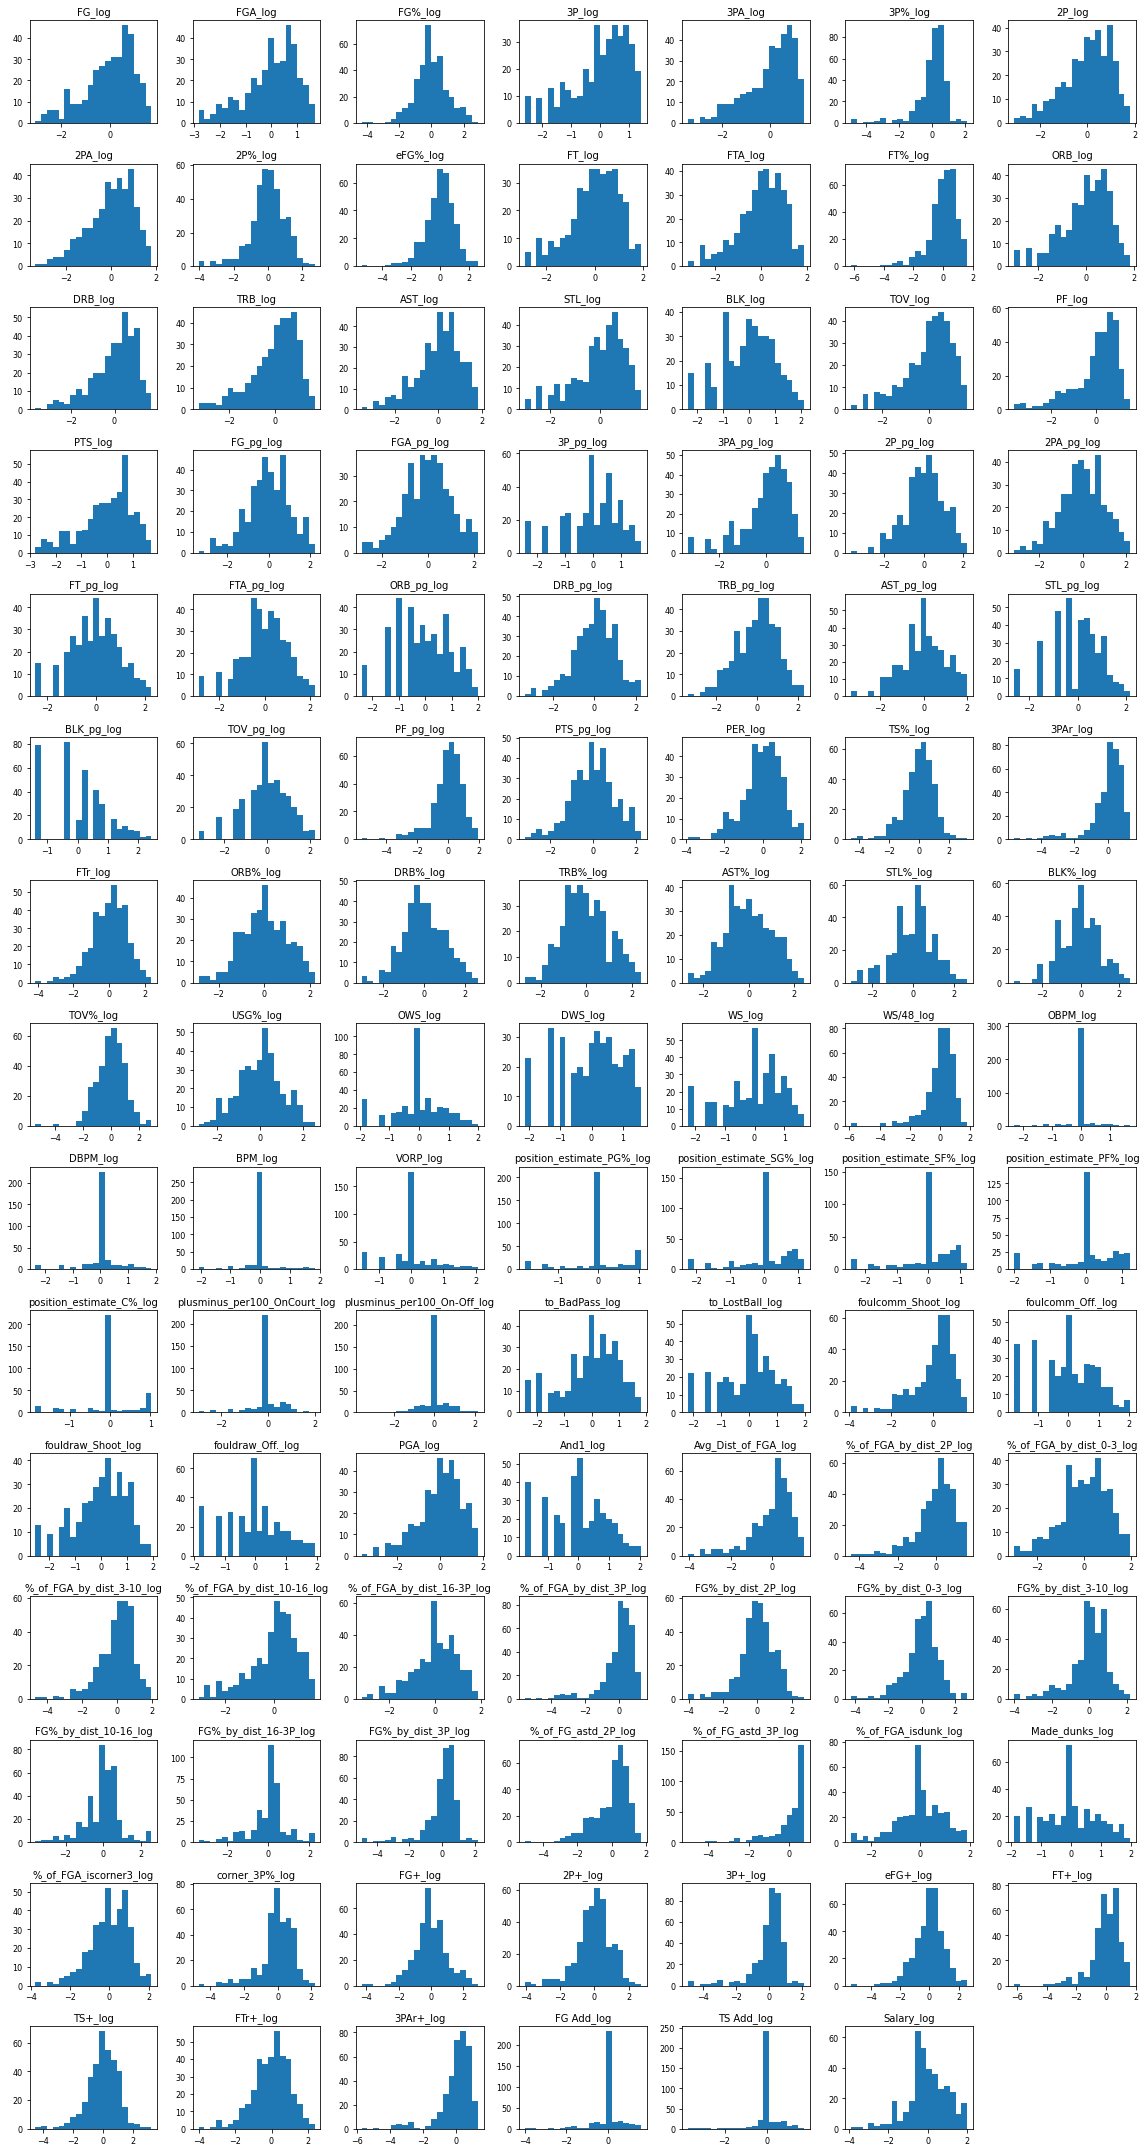

In [29]:
# Check distributions

continuous_ite2_log = df_ite2_log_norm.columns.tolist()

# Calculate the number of rows and columns required to accommodate all the continuous columns
num_columns = len(continuous_ite2_log)
num_rows = math.ceil(num_columns / 7)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a histogram
for i, column in enumerate(continuous_ite2_log):
    # Plot histogram on the corresponding subplot
    ax = axes[i // 7, i % 7]
    ax.hist(df_ite2_log_norm[column], bins=20)
    ax.set_title(column, fontsize=10)
    ax.tick_params(labelsize=8)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Distribution Comments

Positive skew has been removed and more variables now follow a bell shaped curve. Again, like in iteration 1, the percentage a player plays at a position does not have a great shape. Transformations were not able to improve the distribution and will be dropped.

Normalisation has exposed more outliers in the log transformed data.

The variables below now no longer have a normal distribution:

* OBPM
* DBPM
* BPM
* VORP
* Plusminus_per100_OnCourt
* Plusminus_per100_On-Off
* FG_add
* TS_add

### Verify Linear Assumption

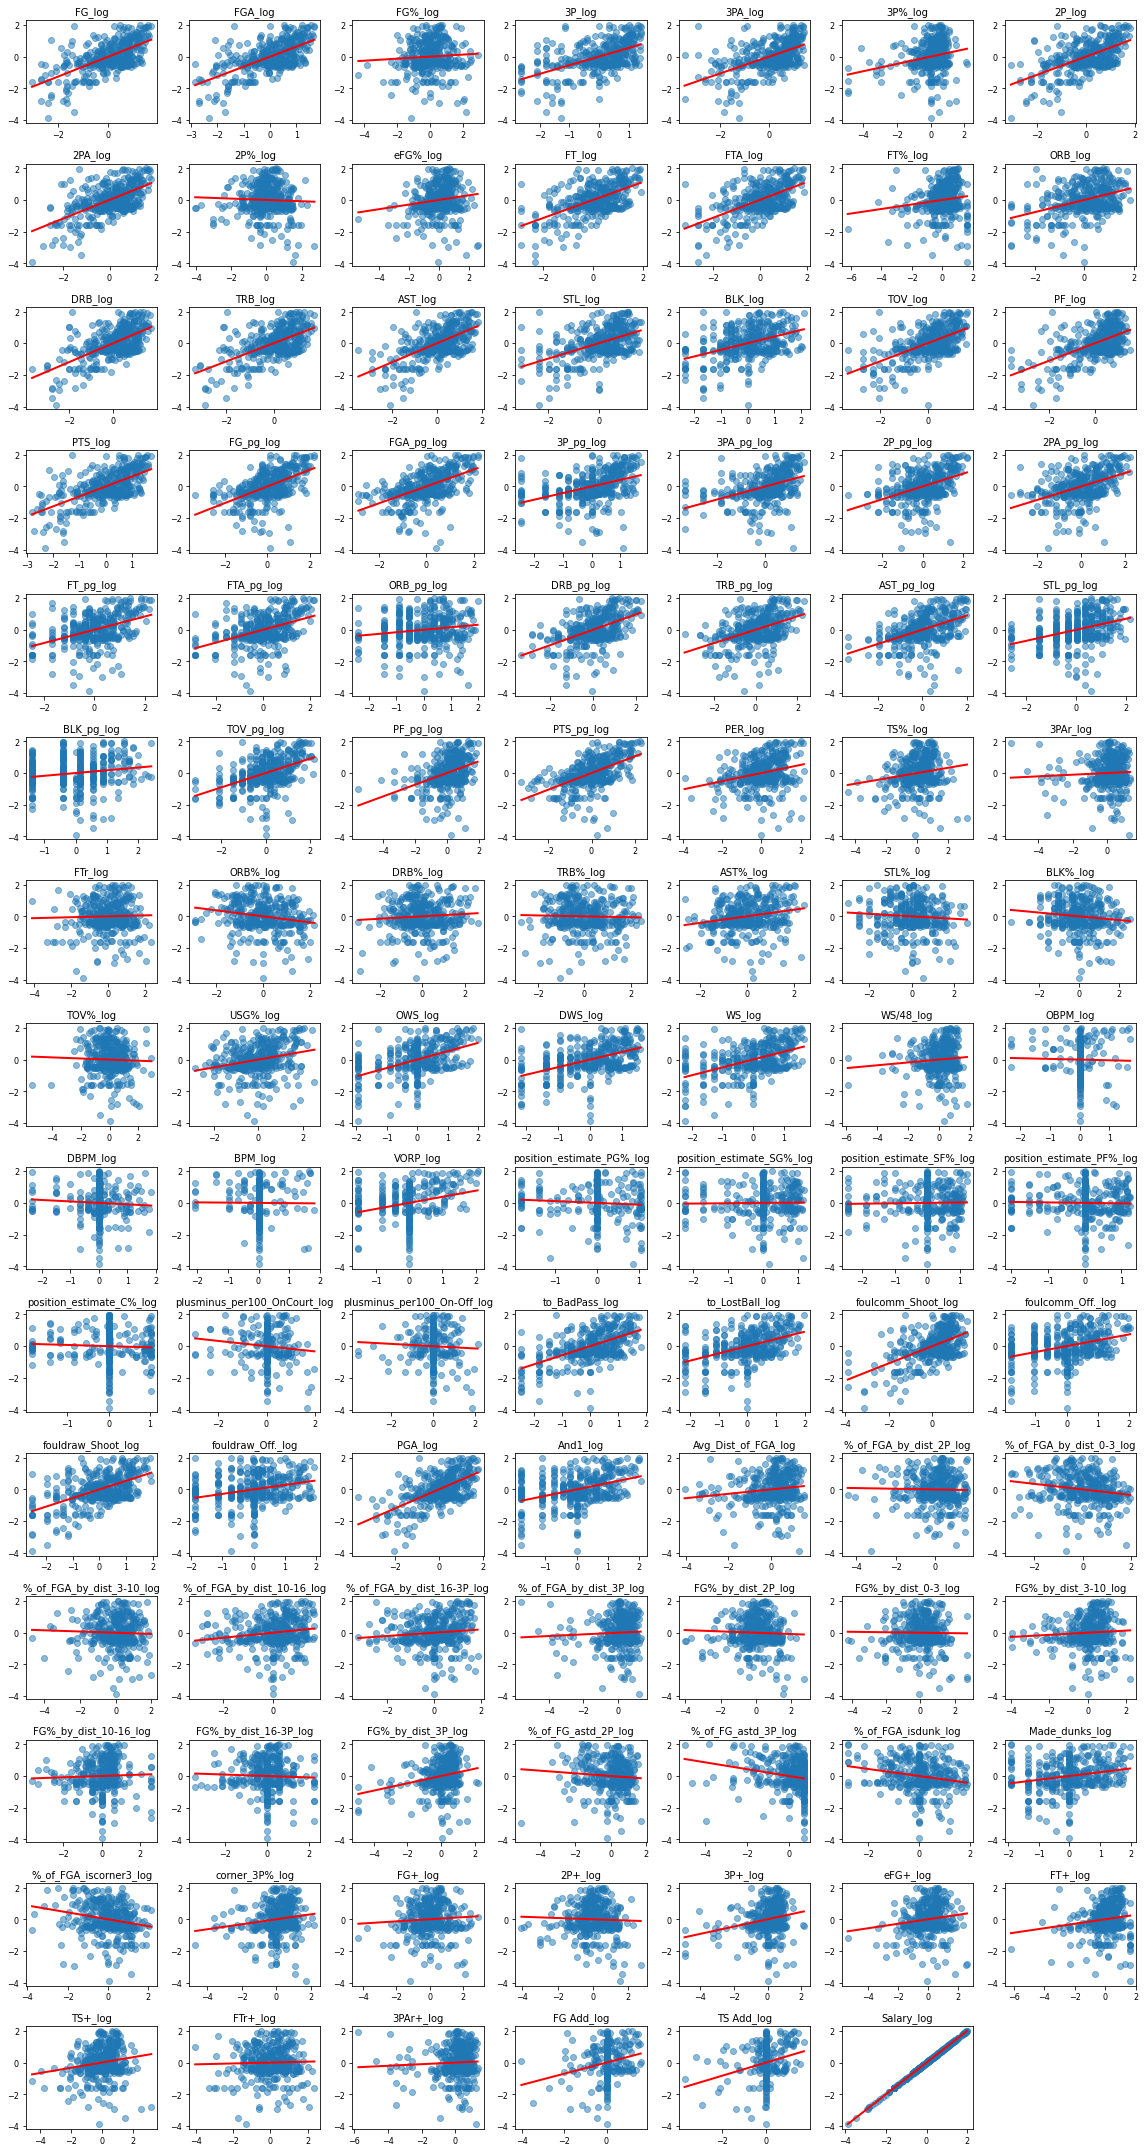

In [30]:
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a scatter plot with regression line
for i, column in enumerate(continuous_ite2_log):
    # Plot scatter plot on the corresponding subplot
    ax = axes[i // 7, i % 7]
    ax.scatter(df_ite2_log_norm[column], df_ite2_log_norm['Salary_log'], alpha=0.5)
    ax.set_title(column, fontsize=10)
    ax.tick_params(labelsize=8)

    # Fit a linear regression model
    model = LinearRegression()
    X = df_ite2_log_norm[column].values.reshape(-1, 1)
    y = df_ite2_log_norm['Salary_log']
    model.fit(X, y)
    X_new = np.array([[df_ite2_log_norm[column].min()], [df_ite2_log_norm[column].max()]])
    preds = model.predict(X_new)

    # Plot the regression line
    ax.plot(X_new, preds, c='red', linewidth=2)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Verify the Homoscedasticity Assumption

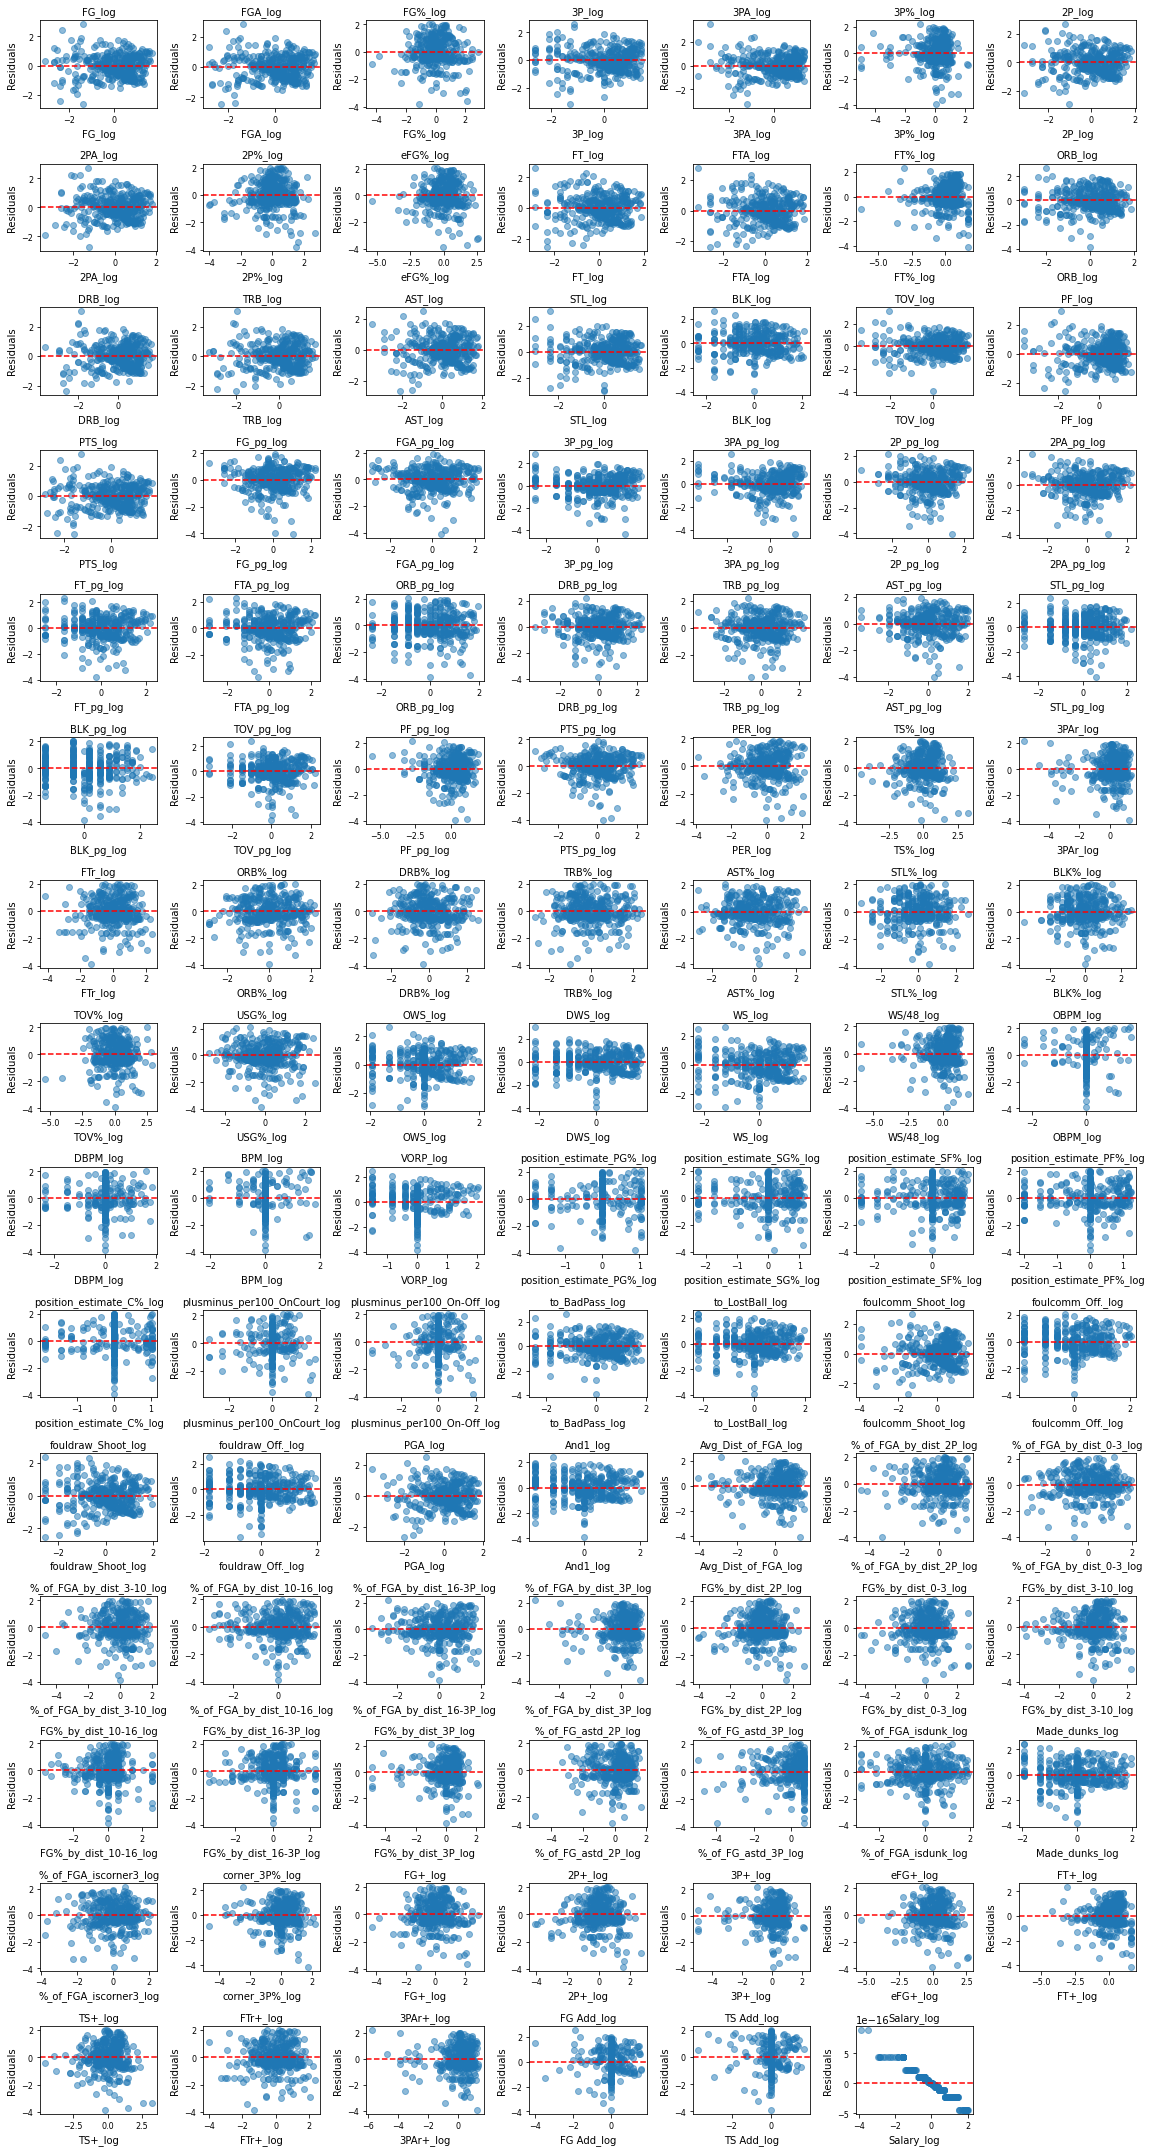

In [31]:
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a residuals versus exog plot
for i, column in enumerate(continuous_ite2_log):
    # Plot residuals versus exog on the corresponding subplot
    ax = axes[i // 7, i % 7]
    X = df_ite2_log_norm[column].values.reshape(-1, 1)
    y = df_ite2_log_norm['Salary_log']
    model.fit(X, y)
    preds = model.predict(X)
    residuals = y - preds
    ax.scatter(X, residuals, alpha=0.5)
    ax.set_title(column, fontsize=10)
    ax.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
    ax.tick_params(labelsize=8)
    ax.set_xlabel(column)
    ax.set_ylabel('Residuals')

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Verify Normality Assumption

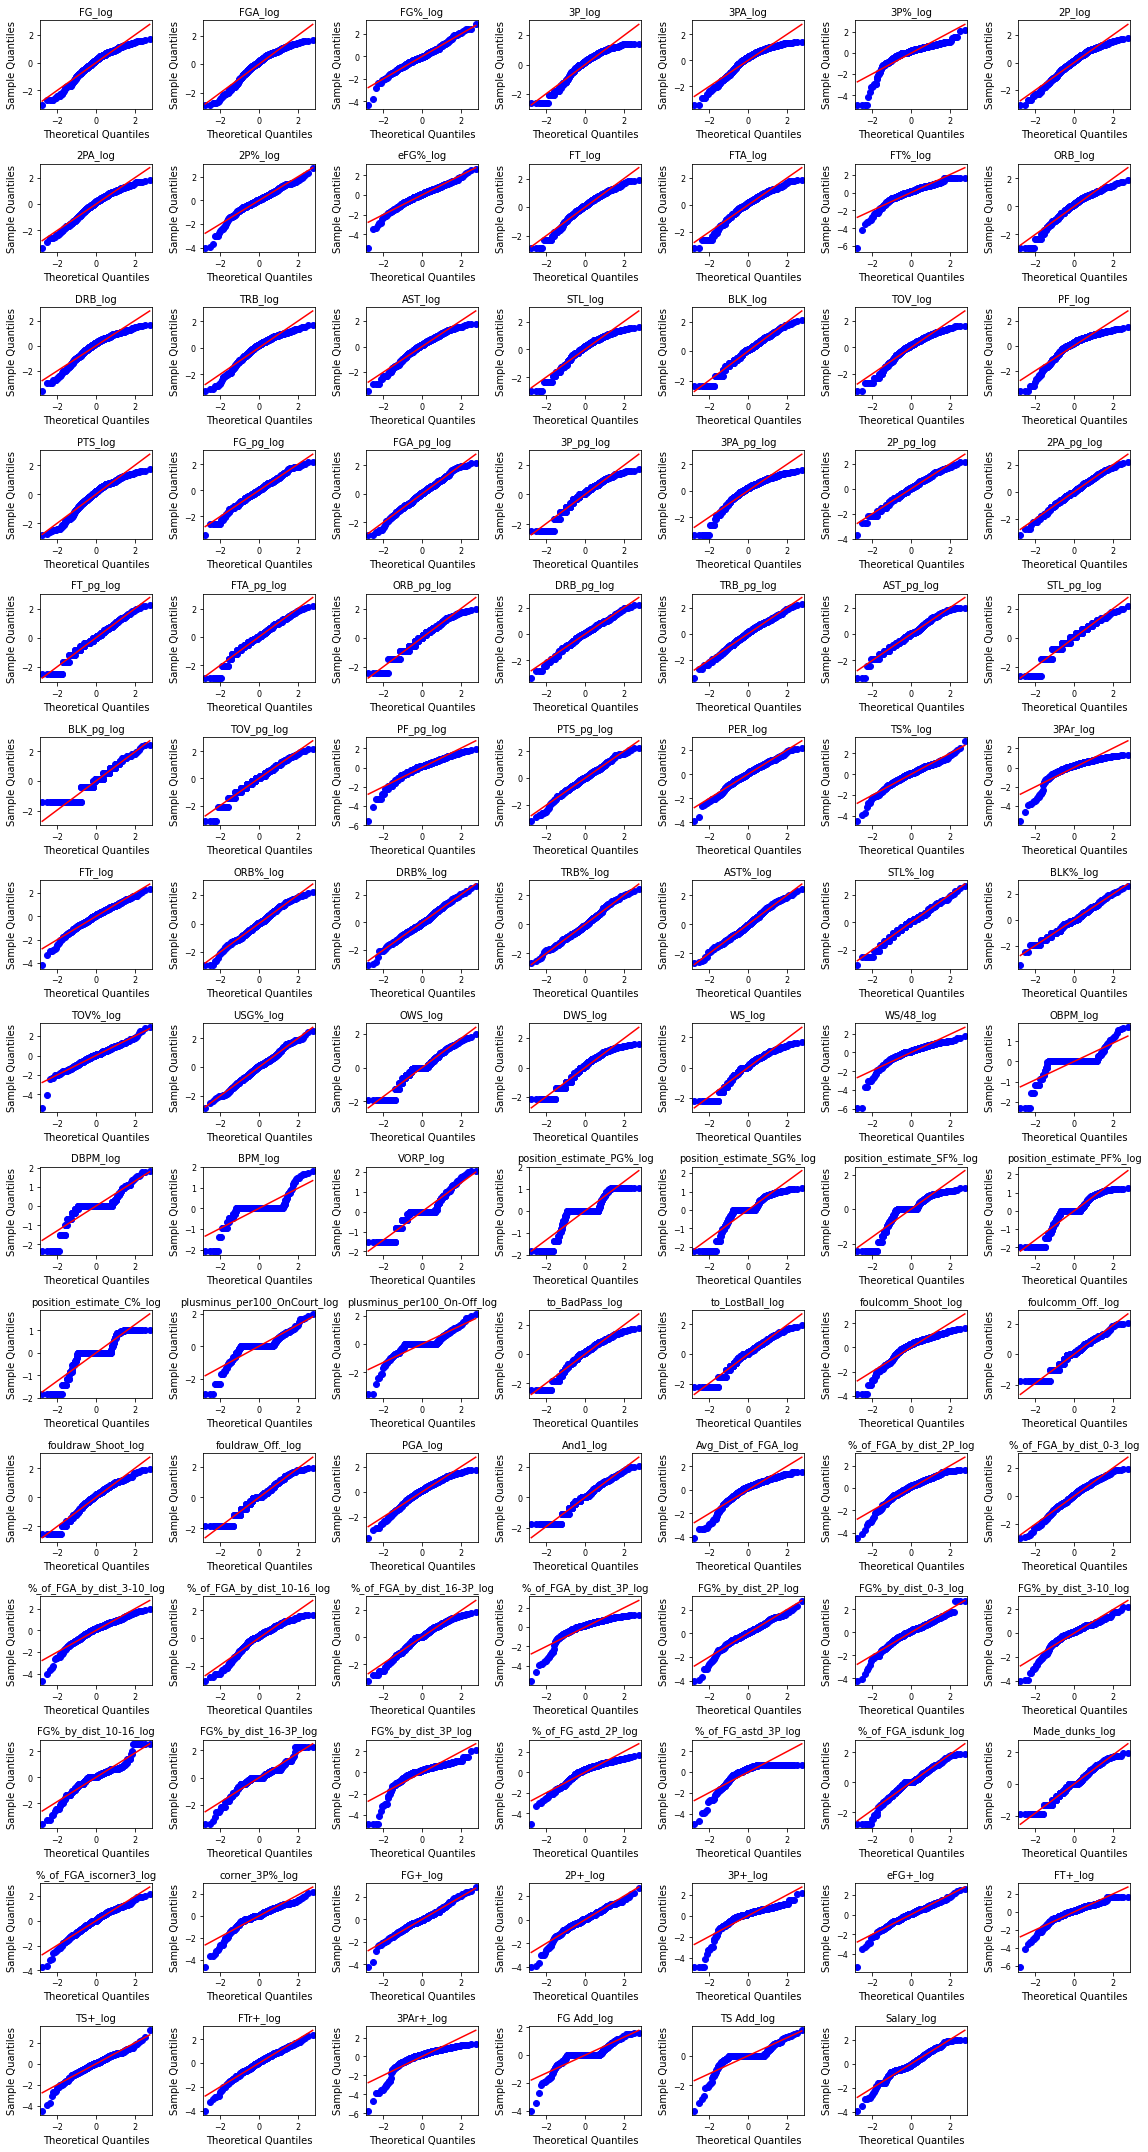

In [32]:
fig, axes = plt.subplots(nrows=num_rows, ncols=7, figsize=(16, num_rows * 2))
fig.subplots_adjust(hspace=0.5)

# Iterate over each continuous column and create a Q-Q plot
for i, column in enumerate(continuous_ite2_log):
    # Plot Q-Q plot on the corresponding subplot
    ax = axes[i // 7, i % 7]
    sm.qqplot(df_ite2_log_norm[column], line='s', ax=ax)
    ax.set_title(column, fontsize=10)
    ax.tick_params(labelsize=8)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    axes[i // 7, i % 7].axis('off')

plt.tight_layout()
plt.show()

### Assumption Comments

#### Linearity

On top of the linear relationships that are weak or negative in iteration 1, the transformations have shown more variables to have a negative relationship listed below:

* FG%
* 2P%
* FTr
* TRB%
* OBPM
* DBPM
* BPM
* plusminus_per100_OnCourt
* plusminus_per100_On-Off
* %_of_FGA_by_dist_2P
* %_of_FGA_by_dist_0-3
* %_of_FGA_by_dist_3-10
* FG%_by_dist_2P
* FG%_by_dist_0-3
* FG%_by_dist_10-16
* FG%_by_dist_16-3P
* %_of_FG_astd_2P
* %_of_FG_astd_3P
* %_of_FGA_isdunk
* %_of_FGA_iscorner3
* FG+
* 2P+
* FTr+

#### Homoscedasticity

All variables do not show any heteroscedasticity features.

#### Normality

All variables have shown an improvement in shape especially at the right end tails. However some variables still show extreme tails on the left end. Taking into consideration the kurtosis value in the model (indicating an optimal mesokurtic curve), it can be assumed the variables now pass the normality assumption.

## Iteration 3

In the iteration 2 model, it was shown that the data has little to no skew and has a mesokurtic curve. Since the homoscedasticity and normality assumptions have not been violated, it is time to narrow down irrelevant variables in order to have an accurate model with high co-efficients.

I will eliminate any variables that do not have a normal distribution, a negative co-efficient and have a weak or negative linear relationship with salary.

In [33]:
print(continuous_ite2_log)

['FG_log', 'FGA_log', 'FG%_log', '3P_log', '3PA_log', '3P%_log', '2P_log', '2PA_log', '2P%_log', 'eFG%_log', 'FT_log', 'FTA_log', 'FT%_log', 'ORB_log', 'DRB_log', 'TRB_log', 'AST_log', 'STL_log', 'BLK_log', 'TOV_log', 'PF_log', 'PTS_log', 'FG_pg_log', 'FGA_pg_log', '3P_pg_log', '3PA_pg_log', '2P_pg_log', '2PA_pg_log', 'FT_pg_log', 'FTA_pg_log', 'ORB_pg_log', 'DRB_pg_log', 'TRB_pg_log', 'AST_pg_log', 'STL_pg_log', 'BLK_pg_log', 'TOV_pg_log', 'PF_pg_log', 'PTS_pg_log', 'PER_log', 'TS%_log', '3PAr_log', 'FTr_log', 'ORB%_log', 'DRB%_log', 'TRB%_log', 'AST%_log', 'STL%_log', 'BLK%_log', 'TOV%_log', 'USG%_log', 'OWS_log', 'DWS_log', 'WS_log', 'WS/48_log', 'OBPM_log', 'DBPM_log', 'BPM_log', 'VORP_log', 'position_estimate_PG%_log', 'position_estimate_SG%_log', 'position_estimate_SF%_log', 'position_estimate_PF%_log', 'position_estimate_C%_log', 'plusminus_per100_OnCourt_log', 'plusminus_per100_On-Off_log', 'to_BadPass_log', 'to_LostBall_log', 'foulcomm_Shoot_log', 'foulcomm_Off._log', 'fouldra

In [34]:
continuous_ite3 = ['FGA_log','eFG%_log', 'FT_log', 'DRB_log', 'PTS_log', 'FG_pg_log', '3P_pg_log', '3PA_pg_log', '2P_pg_log', '2PA_pg_log', 'FT_pg_log', 'FTA_pg_log', 'ORB_pg_log', 'DRB_pg_log', 'TRB_pg_log', 'AST_pg_log', 'STL_pg_log', 'BLK_pg_log', 'TOV_pg_log', 'PF_pg_log', 'PER_log', 'USG%_log', 'OWS_log', 'WS/48_log', 'to_BadPass_log', 'foulcomm_Shoot_log', 'fouldraw_Off._log', 'PGA_log', 'Avg_Dist_of_FGA_log', '%_of_FGA_by_dist_10-16_log', '%_of_FGA_by_dist_16-3P_log', '%_of_FGA_by_dist_3P_log', 'FG%_by_dist_3-10_log', '3P+_log',  'FT+_log', 'TS+_log', '3PAr+_log', 'Salary_log']
print(continuous_ite3)

['FGA_log', 'eFG%_log', 'FT_log', 'DRB_log', 'PTS_log', 'FG_pg_log', '3P_pg_log', '3PA_pg_log', '2P_pg_log', '2PA_pg_log', 'FT_pg_log', 'FTA_pg_log', 'ORB_pg_log', 'DRB_pg_log', 'TRB_pg_log', 'AST_pg_log', 'STL_pg_log', 'BLK_pg_log', 'TOV_pg_log', 'PF_pg_log', 'PER_log', 'USG%_log', 'OWS_log', 'WS/48_log', 'to_BadPass_log', 'foulcomm_Shoot_log', 'fouldraw_Off._log', 'PGA_log', 'Avg_Dist_of_FGA_log', '%_of_FGA_by_dist_10-16_log', '%_of_FGA_by_dist_16-3P_log', '%_of_FGA_by_dist_3P_log', 'FG%_by_dist_3-10_log', '3P+_log', 'FT+_log', 'TS+_log', '3PAr+_log', 'Salary_log']


In [35]:
df_ite3 = df_ite2_log_norm[continuous_ite3]
df_ite3.head()

FGA_log  eFG%_log    FT_log   DRB_log   PTS_log  FG_pg_log  3P_pg_log  \
0  0.505564 -0.108093  0.717879  0.907585  0.514221   0.592318  -0.550251   
3  0.462256  0.066175  0.363385 -0.121150  0.436678   0.188814   0.667715   
4  0.754507  0.494000  0.891863  1.124955  0.804362   0.403209   0.485366   
5  0.206777  0.298092  0.092642 -0.027508  0.204536  -0.198389   0.269693   
6  0.810728  0.656248  0.935368  0.659318  0.873217   0.500546   1.089636   

   3PA_pg_log  2P_pg_log  2PA_pg_log  FT_pg_log  FTA_pg_log  ORB_pg_log  \
0   -0.062998   0.898514    0.863538   0.761548    0.881024    1.489351   
3    0.662384  -0.128820   -0.103183   0.088352    0.097753    0.218191   
4    0.544844   0.351964    0.218324   0.605311    0.651004    0.826522   
5    0.262969  -0.336608   -0.326811  -0.205694   -0.121752   -0.922195   
6    0.953766  -0.128820   -0.103183   0.761548    0.585910    0.397913   

   DRB_pg_log  TRB_pg_log  AST_pg_log  STL_pg_log  BLK_pg_log  TOV_pg_log  \
0    1.192265    1.399190   -0.495479    0.344332    0.875888    0.509693   
3   -0.793705   -0.455444   -0.236037   -0.804302    0.153621   -0.181869   
4    1.014776    1.004981   -0.020058    0.344332    1.133677    0.022441   
5   -0.546283   -0.828746    0.400671    0.042202    0.560381    0.202656   
6    0.266353    0.343041    0.717582    1.016240   -0.419675    0.363863   

   PF_pg_log   PER_log  USG%_log   OWS_log  WS/48_log  to_BadPass_log  \
0   0.504089  0.776008  0.483729  0.027796   0.373659       -0.583488   
3   0.273997 -0.723422 -0.329881  0.139265  -0.403760       -0.017436   
4   0.504089  0.490778 -0.280022  0.941139   0.836723        0.195428   
5   0.015072 -0.086286  0.164758 -0.900451  -0.186917        0.819596   
6   0.148583  0.100644 -0.642970  1.213398   0.760199        1.048529   

   foulcomm_Shoot_log  fouldraw_Off._log   PGA_log  Avg_Dist_of_FGA_log  \
0            0.450377           0.144793 -0.059563            -0.899627   
3            0.673476          -0.725915  0.128130             0.591693   
4            1.065040           0.609265  0.451386             0.191334   
5            0.567608           1.367243  0.560369             0.591693   
6            0.722797           1.367243  0.945814             0.868676   

   %_of_FGA_by_dist_10-16_log  %_of_FGA_by_dist_16-3P_log  \
0                    0.255044                   -1.237549   
3                   -0.927267                   -0.525003   
4                   -0.761162                   -0.856072   
5                   -0.316601                    0.709529   
6                   -0.078885                   -2.196393   

   %_of_FGA_by_dist_3P_log  FG%_by_dist_3-10_log   3P+_log   FT+_log  \
0                -0.515478              0.024684 -0.739455 -0.359944   
3                 0.669401              0.650218  0.265024  0.456784   
4                 0.440789              0.474213  0.265024  0.004629   
5                 0.532059              0.247963  0.545631 -0.682827   
6                 0.827274             -0.675022  0.710448  1.073643   

    TS+_log  3PAr+_log  Salary_log  
0 -0.075851  -0.506956   -0.175201  
3  0.017985   0.660316    0.091405  
4  0.561256   0.440565   -0.427652  
5  0.110848   0.528175    0.294946  
6  0.821021   0.825729    0.773371

### Multicollinearity

Check now that many variables have been dropped

In [36]:
df_ite3_preprocessed = df_ite3.loc[:, continuous_ite3]
df_ite3_preprocessed.head()

FGA_log  eFG%_log    FT_log   DRB_log   PTS_log  FG_pg_log  3P_pg_log  \
0  0.505564 -0.108093  0.717879  0.907585  0.514221   0.592318  -0.550251   
3  0.462256  0.066175  0.363385 -0.121150  0.436678   0.188814   0.667715   
4  0.754507  0.494000  0.891863  1.124955  0.804362   0.403209   0.485366   
5  0.206777  0.298092  0.092642 -0.027508  0.204536  -0.198389   0.269693   
6  0.810728  0.656248  0.935368  0.659318  0.873217   0.500546   1.089636   

   3PA_pg_log  2P_pg_log  2PA_pg_log  FT_pg_log  FTA_pg_log  ORB_pg_log  \
0   -0.062998   0.898514    0.863538   0.761548    0.881024    1.489351   
3    0.662384  -0.128820   -0.103183   0.088352    0.097753    0.218191   
4    0.544844   0.351964    0.218324   0.605311    0.651004    0.826522   
5    0.262969  -0.336608   -0.326811  -0.205694   -0.121752   -0.922195   
6    0.953766  -0.128820   -0.103183   0.761548    0.585910    0.397913   

   DRB_pg_log  TRB_pg_log  AST_pg_log  STL_pg_log  BLK_pg_log  TOV_pg_log  \
0    1.192265    1.399190   -0.495479    0.344332    0.875888    0.509693   
3   -0.793705   -0.455444   -0.236037   -0.804302    0.153621   -0.181869   
4    1.014776    1.004981   -0.020058    0.344332    1.133677    0.022441   
5   -0.546283   -0.828746    0.400671    0.042202    0.560381    0.202656   
6    0.266353    0.343041    0.717582    1.016240   -0.419675    0.363863   

   PF_pg_log   PER_log  USG%_log   OWS_log  WS/48_log  to_BadPass_log  \
0   0.504089  0.776008  0.483729  0.027796   0.373659       -0.583488   
3   0.273997 -0.723422 -0.329881  0.139265  -0.403760       -0.017436   
4   0.504089  0.490778 -0.280022  0.941139   0.836723        0.195428   
5   0.015072 -0.086286  0.164758 -0.900451  -0.186917        0.819596   
6   0.148583  0.100644 -0.642970  1.213398   0.760199        1.048529   

   foulcomm_Shoot_log  fouldraw_Off._log   PGA_log  Avg_Dist_of_FGA_log  \
0            0.450377           0.144793 -0.059563            -0.899627   
3            0.673476          -0.725915  0.128130             0.591693   
4            1.065040           0.609265  0.451386             0.191334   
5            0.567608           1.367243  0.560369             0.591693   
6            0.722797           1.367243  0.945814             0.868676   

   %_of_FGA_by_dist_10-16_log  %_of_FGA_by_dist_16-3P_log  \
0                    0.255044                   -1.237549   
3                   -0.927267                   -0.525003   
4                   -0.761162                   -0.856072   
5                   -0.316601                    0.709529   
6                   -0.078885                   -2.196393   

   %_of_FGA_by_dist_3P_log  FG%_by_dist_3-10_log   3P+_log   FT+_log  \
0                -0.515478              0.024684 -0.739455 -0.359944   
3                 0.669401              0.650218  0.265024  0.456784   
4                 0.440789              0.474213  0.265024  0.004629   
5                 0.532059              0.247963  0.545631 -0.682827   
6                 0.827274             -0.675022  0.710448  1.073643   

    TS+_log  3PAr+_log  Salary_log  
0 -0.075851  -0.506956   -0.175201  
3  0.017985   0.660316    0.091405  
4  0.561256   0.440565   -0.427652  
5  0.110848   0.528175    0.294946  
6  0.821021   0.825729    0.773371

In [37]:
# No scatter matrix, too many variables

df_ite3_preprocessed.corr()

FGA_log  eFG%_log    FT_log   DRB_log   PTS_log  \
FGA_log                     1.000000  0.223225  0.894145  0.912745  0.992828   
eFG%_log                    0.223225  1.000000  0.242281  0.323907  0.319850   
FT_log                      0.894145  0.242281  1.000000  0.837976  0.919239   
DRB_log                     0.912745  0.323907  0.837976  1.000000  0.919762   
PTS_log                     0.992828  0.319850  0.919239  0.919762  1.000000   
FG_pg_log                   0.810022  0.327287  0.775936  0.685394  0.826241   
3P_pg_log                   0.608924  0.214923  0.471686  0.476839  0.603486   
3PA_pg_log                  0.606778  0.015539  0.434062  0.420740  0.576916   
2P_pg_log                   0.646643  0.248809  0.719920  0.579884  0.671114   
2PA_pg_log                  0.665641  0.125485  0.729998  0.569203  0.676883   
FT_pg_log                   0.614855  0.137982  0.835088  0.531761  0.650718   
FTA_pg_log                  0.606280  0.163538  0.838508  0.538250  0.645863   
ORB_pg_log                  0.306580  0.321918  0.384565  0.478765  0.343487   
DRB_pg_log                  0.673710  0.322629  0.659488  0.819979  0.692378   
TRB_pg_log                  0.615649  0.349488  0.631814  0.780750  0.642285   
AST_pg_log                  0.605549 -0.010244  0.559162  0.475373  0.588990   
STL_pg_log                  0.572509  0.112289  0.509242  0.499378  0.565423   
BLK_pg_log                  0.188392  0.203951  0.206700  0.334204  0.208203   
TOV_pg_log                  0.657005  0.112009  0.684461  0.572761  0.662470   
PF_pg_log                   0.590660  0.282636  0.589575  0.635453  0.609222   
PER_log                     0.332177  0.658027  0.471829  0.359988  0.411798   
USG%_log                    0.331988 -0.053642  0.405506  0.123175  0.334648   
OWS_log                     0.583206  0.181849  0.540275  0.555275  0.589185   
WS/48_log                   0.090612  0.521877  0.207648  0.168528  0.157392   
to_BadPass_log              0.821783  0.106266  0.736793  0.730204  0.808179   
foulcomm_Shoot_log          0.864196  0.311551  0.792367  0.903464  0.871627   
fouldraw_Off._log           0.428524  0.095244  0.463102  0.368095  0.436960   
PGA_log                     0.892288  0.126781  0.799503  0.811459  0.878366   
Avg_Dist_of_FGA_log         0.172187 -0.192739 -0.036859 -0.000233  0.123130   
%_of_FGA_by_dist_10-16_log  0.098404 -0.202883  0.106896 -0.016470  0.077313   
%_of_FGA_by_dist_16-3P_log  0.021593 -0.253383  0.006426 -0.125146 -0.005287   
%_of_FGA_by_dist_3P_log     0.117483 -0.149498 -0.064986 -0.013822  0.076878   
FG%_by_dist_3-10_log        0.039477  0.332333  0.060929  0.054876  0.075788   
3P+_log                     0.288423  0.517012  0.230947  0.263941  0.327008   
FT+_log                     0.237973  0.080730  0.278696  0.129450  0.247924   
TS+_log                     0.254987  0.963016  0.364440  0.336622  0.361710   
3PAr+_log                   0.117154 -0.150048 -0.064152 -0.014102  0.076656   
Salary_log                  0.633166  0.145519  0.569411  0.603204  0.629792   

                            FG_pg_log  3P_pg_log  3PA_pg_log  2P_pg_log  \
FGA_log                      0.810022   0.608924    0.606778   0.646643   
eFG%_log                     0.327287   0.214923    0.015539   0.248809   
FT_log                       0.775936   0.471686    0.434062   0.719920   
DRB_log                      0.685394   0.476839    0.420740   0.579884   
PTS_log                      0.826241   0.603486    0.576916   0.671114   
FG_pg_log                    1.000000   0.622134    0.619073   0.880891   
3P_pg_log                    0.622134   1.000000    0.771065   0.289439   
3PA_pg_log                   0.619073   0.771065    1.000000   0.277268   
2P_pg_log                    0.880891   0.289439    0.277268   1.000000   
2PA_pg_log                   0.877420   0.321800    0.314864   0.978688   
FT_pg_log                    0.765435   0.388841    0.376689   0.766905   
FTA_pg_l

In [38]:
abs(df_ite3_preprocessed.corr()) > 0.75

FGA_log  eFG%_log  FT_log  DRB_log  PTS_log  \
FGA_log                        True     False    True     True     True   
eFG%_log                      False      True   False    False    False   
FT_log                         True     False    True     True     True   
DRB_log                        True     False    True     True     True   
PTS_log                        True     False    True     True     True   
FG_pg_log                      True     False    True    False     True   
3P_pg_log                     False     False   False    False    False   
3PA_pg_log                    False     False   False    False    False   
2P_pg_log                     False     False   False    False    False   
2PA_pg_log                    False     False   False    False    False   
FT_pg_log                     False     False    True    False    False   
FTA_pg_log                    False     False    True    False    False   
ORB_pg_log                    False     False   False    False    False   
DRB_pg_log                    False     False   False     True    False   
TRB_pg_log                    False     False   False     True    False   
AST_pg_log                    False     False   False    False    False   
STL_pg_log                    False     False   False    False    False   
BLK_pg_log                    False     False   False    False    False   
TOV_pg_log                    False     False   False    False    False   
PF_pg_log                     False     False   False    False    False   
PER_log                       False     False   False    False    False   
USG%_log                      False     False   False    False    False   
OWS_log                       False     False   False    False    False   
WS/48_log                     False     False   False    False    False   
to_BadPass_log                 True     False   False    False     True   
foulcomm_Shoot_log             True     False    True     True     True   
fouldraw_Off._log             False     False   False    False    False   
PGA_log                        True     False    True     True     True   
Avg_Dist_of_FGA_log           False     False   False    False    False   
%_of_FGA_by_dist_10-16_log    False     False   False    False    False   
%_of_FGA_by_dist_16-3P_log    False     False   False    False    False   
%_of_FGA_by_dist_3P_log       False     False   False    False    False   
FG%_by_dist_3-10_log          False     False   False    False    False   
3P+_log                       False     False   False    False    False   
FT+_log                       False     False   False    False    False   
TS+_log                       False      True   False    False    False   
3PAr+_log                     False     False   False    False    False   
Salary_log                    False     False   False    False    False   

                            FG_pg_log  3P_pg_log  3PA_pg_log  2P_pg_log  \
FGA_log                          True      False       False      False   
eFG%_log                        False      False       False      False   
FT_log                           True      False       False      False   
DRB_log                         False      False       False      False   
PTS_log                          True      False       False      False   
FG_pg_log                        True      False       False       True   
3P_pg_log                       False       True        True      False   
3PA_pg_log                      False       True        True      False   
2P_pg_log                        True      False       False       True   
2PA_pg_log                       True      False       False       True   
FT_pg_log                        True      False       False       True   
FTA_pg_log                       True      False       False       True   
ORB_pg_log                      False      False       False      False   
DRB_pg_log                       True      False    

In [39]:
df_ite3_corr_pairs = df_ite3_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_ite3_corr_pairs['pairs'] = list(zip(df_ite3_corr_pairs.level_0, df_ite3_corr_pairs.level_1))

df_ite3_corr_pairs.set_index(['pairs'], inplace = True)

df_ite3_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_ite3_corr_pairs.columns = ['cc']

df_ite3_corr_pairs.drop_duplicates(inplace=True)

df_ite3_corr_pairs[(df_ite3_corr_pairs.cc>.75) & (df_ite3_corr_pairs.cc<1)]

cc
pairs                                                   
(3PAr+_log, %_of_FGA_by_dist_3P_log)            0.999885
(PTS_log, FGA_log)                              0.992828
(2PA_pg_log, 2P_pg_log)                         0.978688
(TRB_pg_log, DRB_pg_log)                        0.965661
(eFG%_log, TS+_log)                             0.963016
(FTA_pg_log, FT_pg_log)                         0.949663
(DRB_log, PTS_log)                              0.919762
(FT_log, PTS_log)                               0.919239
(FGA_log, DRB_log)                              0.912745
(DRB_log, foulcomm_Shoot_log)                   0.903464
(Avg_Dist_of_FGA_log, %_of_FGA_by_dist_3P_log)  0.897658
(Avg_Dist_of_FGA_log, 3PAr+_log)                0.895343
(FT_log, FGA_log)                               0.894145
(PGA_log, FGA_log)                              0.892288
(FG_pg_log, 2P_pg_log)                          0.880891
(PGA_log, PTS_log)                              0.878366
(2PA_pg_log, FG_pg_log)                         0.877420
(PTS_log, foulcomm_Shoot_log)                   0.871627
(foulcomm_Shoot_log, FGA_log)                   0.864196
(to_BadPass_log, PGA_log)                       0.848475
(FTA_pg_log, FT_log)                            0.838508
(DRB_log, FT_log)                               0.837976
(AST_pg_log, PGA_log)                           0.835199
(FT_pg_log, FT_log)                             0.835088
(PTS_log, FG_pg_log)                            0.826241
(FTA_pg_log, 2PA_pg_log)                        0.825257
(FGA_log, to_BadPass_log)                       0.821783
(DRB_log, DRB_pg_log)                           0.819979
(2P_pg_log, FTA_pg_log)                         0.815409
(DRB_log, PGA_log)                              0.811459
(FG_pg_log, FGA_log)                            0.810022
(to_BadPass_log, PTS_log)                       0.808179
(TOV_pg_log, FG_pg_log)                         0.802951
(FT_log, PGA_log)                               0.799503
(TOV_pg_log, 2PA_pg_log)                        0.795661
(FT_log, foulcomm_Shoot_log)                    0.792367
(TRB_pg_log, ORB_pg_log)                        0.791415
(2PA_pg_log, FT_pg_log)                         0.783292
(foulcomm_Shoot_log, PGA_log)                   0.781771
(DRB_log, TRB_pg_log)                           0.780750
(FG_pg_log, FTA_pg_log)                         0.779554
(FG_pg_log, FT_log)                             0.775936
(3P_pg_log, 3PA_pg_log)                         0.771065
(TOV_pg_log, AST_pg_log)                        0.769624
(TOV_pg_log, 2P_pg_log)                         0.769438
(2P_pg_log, FT_pg_log)                          0.766905
(FG_pg_log, DRB_pg_log)                         0.765738
(FT_pg_log, FG_pg_log)                          0.765435

In [40]:
X = df_ite3.drop('Salary_log', axis=1)
y = df_ite3['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     8.362
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.11e-29
Time:                        20:49:56   Log-Likelihood:                -393.18
No. Observations:                 363   AIC:                             862.4
Df Residuals:                     325   BIC:                             1010.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.335e-14      0.040   5.89e-13      1.000      -0.078       0.078
FGA_log                        0.9741      3.538      0.275      0.783      -5.987       7.935
eFG%_log                       0.4810      0.437      1.101      0.272      -0.378       1.340
FT_log                        -0.8513      1.081     -0.787      0.432      -2.978       1.276
DRB_log                       -1.0230      1.684     -0.607      0.544      -4.336       2.290
PTS_log                        0.9820      3.390      0.290      0.772      -5.687       7.651
FG_pg_log                     -1.2877      1.023     -1.259      0.209      -3.300       0.725
3P_pg_log                     -0.0963      0.089     -1.086      0.278      -0.271       0.078
3PA_pg_log                     0.3948      0.193      2.047      0.041       0.015       0.774
2P_pg_log                     -0.2603      0.411     -0.633      0.527      -1.069       0.549
2PA_pg_log                     0.2093      0.410      0.511      0.610      -0.596       1.015
FT_pg_log                     -0.0458      0.170     -0.270      0.788      -0.380       0.288
FTA_pg_log                     0.7058      0.737      0.958      0.339      -0.744       2.156
ORB_pg_log                    -0.2146      0.124     -1.738      0.083      -0.458       0.028
DRB_pg_log                     0.4702      0.857      0.549      0.584      -1.216       2.157
TRB_pg_log                     0.3023      0.415      0.728      0.467      -0.515       1.120
AST_pg_log                    -0.1826      0.518     -0.353      0.725      -1.201       0.836
STL_pg_log                    -0.1421      0.076     -1.866      0.063      -0.292       0.008
BLK_pg_log                     0.0731      0.058      1.255      0.210      -0.042       0.188
TOV_pg_log                     0.0233      0.147      0.158      0.874      -0.266       0.313
PF_pg_log                      0.1040      0.110      0.943      0.346      -0.113       0.321
PER_log                        0.2263      0.170      1.334      0.183      -0.108       0.560
USG%_log                      -0.0778      0.152     -0.512      0.609      -0.376       0.221
OWS_log                        0.1777      0.064      2.795      0.005       0.053       0.303
WS/48_log                      0.0184      0.058      0.319      0.750      -0.095       0.132
to_BadPass_log                 0.1887      0.102      1.848      0.065      -0.012       0.390
foulcomm_Shoot_log            -0.0089      0.157     -0.057      0.955      -0.318       0.300
fouldraw_Off._log             -0.0423      0.056     -0.757      0.449      -0.152       0.068
PGA_log                        0.2858      0.758      0.377      0.706      -1.205       1.776
Avg_Dist_of_FGA_log            0.0510      

In [41]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                                    coef  std err             t  P>|t|  \
PTS_log                     9.820000e-01    3.390  2.900000e-01  0.772   
FGA_log                     9.741000e-01    3.538  2.750000e-01  0.783   
FTA_pg_log                  7.058000e-01    0.737  9.580000e-01  0.339   
eFG%_log                    4.810000e-01    0.437  1.101000e+00  0.272   
DRB_pg_log                  4.702000e-01    0.857  5.490000e-01  0.584   
3PA_pg_log                  3.948000e-01    0.193  2.047000e+00  0.041   
3PAr+_log                   3.735000e-01    4.271  8.700000e-02  0.930   
TRB_pg_log                  3.023000e-01    0.415  7.280000e-01  0.467   
PGA_log                     2.858000e-01    0.758  3.770000e-01  0.706   
PER_log                     2.263000e-01    0.170  1.334000e+00  0.183   
2PA_pg_log                  2.093000e-01    0.410  5.110000e-01  0.610   
to_BadPass_log              1.887000e-01    0.102  1.848000e+00  0.065   
OWS_log                     1.777000e-

In [42]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

                  coef  std err      t  P>|t|  [0.025  0.975]
OWS_log         0.1777    0.064  2.795  0.005   0.053   0.303
3PA_pg_log      0.3948    0.193  2.047  0.041   0.015   0.774
STL_pg_log     -0.1421    0.076 -1.866  0.063  -0.292   0.008
to_BadPass_log  0.1887    0.102  1.848  0.065  -0.012   0.390
ORB_pg_log     -0.2146    0.124 -1.738  0.083  -0.458   0.028


### Model Validation

In [43]:
from sklearn.model_selection import train_test_split

X = df_ite3.drop('Salary_log', axis=1)
y = df_ite3['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.5071394965396088
Test Mean Squared Error:  1.1907476329196478


In [44]:
# Using K-Fold Cross Validation to verify

X = df_ite3.drop('Salary_log', axis=1)
y = df_ite3['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.6785123351362577
Test Mean Squared Error: 0.6703792461007669


In [45]:
# Use feature selector to get top 5 variables

from sklearn.feature_selection import RFE

selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X_train, y_train.values)

selector.support_

array([False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True])

In [46]:
selected_columns = X_train.columns[selector.support_]
linreg.fit(X_train[selected_columns], y_train)
print(selected_columns)

Index(['PTS_log', 'FG_pg_log', '3PA_pg_log', '%_of_FGA_by_dist_3P_log',
       '3PAr+_log'],
      dtype='object')


### Iteration 3 Comments

Even with the removal of more independent variables, there is still a large presence of multicollinearity, the adjusted r-squared value is lower than the r-squared value and the model is overfitting. Therefore I am not able to trust the results of the model that been generated

Moving forward, instead of combining all data sets into one data set, I will evaluate each data set on their own and identify any common trends between the strongest performing variables. Since the assumptions and the effect of the transformations have been observed in previous iterations, I will apply directly to each new data set.

## Iteration 4

In [47]:
# Import the newly created data sets

df_sal_tot = pd.read_csv('data/df_sal_tot.csv')
df_sal_pg = pd.read_csv('data/df_sal_pg.csv')
df_sal_adv = pd.read_csv('data/df_sal_adv.csv')
df_sal_pbp = pd.read_csv('data/df_sal_pbp.csv')
df_sal_shoot = pd.read_csv('data/df_sal_shoot.csv')
df_sal_adjshoot = pd.read_csv('data/df_sal_adjshoot.csv')

In [48]:
df_sal_tot.columns.tolist()

['Unnamed: 0',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Salary']

In [49]:
continuous_sal_tot = [
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Salary']

In [50]:
# Reduce by 3 standard deviations

df_sal_tot_ite4 = df_sal_tot[~df_sal_tot[continuous_sal_tot].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

# Identify multicollinearity

df_sal_tot_ite4_preprocessed = df_sal_tot_ite4.loc[:, continuous_sal_tot]

df_sal_tot_ite4_corr_pairs = df_sal_tot_ite4_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_sal_tot_ite4_corr_pairs['pairs'] = list(zip(df_sal_tot_ite4_corr_pairs.level_0, df_sal_tot_ite4_corr_pairs.level_1))

df_sal_tot_ite4_corr_pairs.set_index(['pairs'], inplace=True)

df_sal_tot_ite4_corr_pairs.drop(columns=['level_1', 'level_0'], inplace=True)

# cc for correlation coefficient
df_sal_tot_ite4_corr_pairs.columns = ['cc']

df_sal_tot_ite4_corr_pairs.drop_duplicates(inplace=True)

df_sal_tot_ite4_corr_pairs[(df_sal_tot_ite4_corr_pairs.cc > 0.75) & (df_sal_tot_ite4_corr_pairs.cc < 1)]

cc
pairs                
(FG, PTS)    0.994446
(FT, FTA)    0.992896
(PTS, FGA)   0.990236
(3P, 3PA)    0.990055
(2P, 2PA)    0.989676
(FG, FGA)    0.988692
(TRB, DRB)   0.984582
(2PA, FG)    0.960040
(2P, FG)     0.954240
(PTS, 2PA)   0.940995
(2PA, FGA)   0.940193
(2P, PTS)    0.930282
(2P, FGA)    0.915783
(FT, PTS)    0.908721
(FTA, PTS)   0.903725
(FG, TOV)    0.898476
(TOV, FGA)   0.897775
(TOV, 2PA)   0.897704
(PTS, TOV)   0.891838
(2PA, FTA)   0.887182
(FTA, 2P)    0.882825
(FTA, FG)    0.880284
(FG, FT)     0.880160
(TOV, 2P)    0.880034
(3PA, FGA)   0.878534
(FT, 2PA)    0.877462
(AST, TOV)   0.872817
(TRB, ORB)   0.869314
(FT, 2P)     0.868452
(FT, FGA)    0.868298
(FTA, FGA)   0.863563
(PTS, 3PA)   0.855959
(FGA, 3P)    0.850641
(FG%, eFG%)  0.847433
(PTS, 3P)    0.837394
(PF, TRB)    0.829571
(PF, DRB)    0.826108
(3PA, FG)    0.825858
(FTA, TOV)   0.821143
(FT, TOV)    0.814954
(FG, DRB)    0.811403
(3P, FG)     0.804834
(2P, DRB)    0.796747
(DRB, PTS)   0.794478
(TRB, 2P)    0.783652
(FGA, DRB)   0.781925
(FGA, AST)   0.781304
(PF, STL)    0.776210
(TRB, FG)    0.774945
(DRB, 2PA)   0.774916
(TOV, DRB)   0.773999
(AST, STL)   0.770823
(DRB, ORB)   0.769455
(FG, AST)    0.765656
(TOV, PF)    0.759127
(FG, PF)     0.757693
(PTS, AST)   0.757557
(2PA, AST)   0.757482
(FGA, STL)   0.756395
(PTS, TRB)   0.753434
(TRB, 2PA)   0.753226
(PF, PTS)    0.750332
(STL, TOV)   0.750181

In [51]:
# Drop stats that total and attempts

continuous_sal_tot = [
 'FG',
 'FG%',
 '3P',
 '3P%',
 '2P',
 '2P%',
 'eFG%',
 'FT',
 'FT%',
 'ORB',
 'DRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Salary']

In [52]:
# Log transform and normalize

df_sal_tot_ite4_cont = df_sal_tot[continuous_sal_tot]

# log features
log_names = [f'{column}_log' for column in df_sal_tot_ite4_cont.columns]

df_sal_tot_ite4_log = np.log(df_sal_tot_ite4_cont[df_sal_tot_ite4_cont > 0])
df_sal_tot_ite4_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_sal_tot_ite4_log_norm = df_sal_tot_ite4_log.apply(normalize)

# Replace NaN values with 0
# 0 still holds value in analysis

df_sal_tot_ite4_log_norm.fillna(0, inplace=True)

# Check NaN and Null values

for check_type in ['NaN', 'Null']:
    na_counts = df_sal_tot_ite4_log_norm.isna().sum() if check_type == 'NaN' else df_sal_tot_ite4_log_norm.isnull().sum()
    columns_with_na = df_sal_tot_ite4_log_norm.columns[na_counts > 0].tolist()

    if len(columns_with_na) == 0:
        print(f"No {check_type} values in dataframe")
    else:
        for column in columns_with_na:
            print(f"{column}: {na_counts[column]}")

No NaN values in dataframe
No Null values in dataframe


In [53]:
X = df_sal_tot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_tot_ite4_log_norm['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     41.72
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.43e-85
Time:                        20:49:57   Log-Likelihood:                -530.19
No. Observations:                 537   AIC:                             1096.
Df Residuals:                     519   BIC:                             1174.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.824e-15      0.029   9.91e-14      1.000      -0.056       0.056
FG_log        -0.2560      0.230     -1.114      0.266      -0.708       0.195
FG%_log        0.0888      0.092      0.969      0.333      -0.091       0.269
3P_log        -0.0262      0.062     -0.421      0.674      -0.149       0.096
3P%_log        0.0338      0.043      0.779      0.436      -0.051       0.119
2P_log        -0.1702      0.087     -1.954      0.051      -0.341       0.001
2P%_log        0.0053      0.047      0.113      0.910      -0.087       0.098
eFG%_log      -0.1655      0.095     -1.750      0.081      -0.351       0.020
FT_log         0.0484      0.064      0.752      0.452      -0.078       0.175
FT%_log       -0.0238      0.034     -0.698      0.486      -0.091       0.043
ORB_log       -0.1528      0.059     -2.596      0.010      -0.268      -0.037
DRB_log        0.3398      0.075      4.550      0.000       0.193       0.487
AST_log        0.2200      0.070      3.163      0.002       0.083       0.357
STL_log       -0.1240      0.059     -2.090      0.037      -0.240      -0.007
BLK_log        0.1186      0.047      2.519      0.012       0.026       0.211
TOV_log        0.0458      0.071      0.641      0.522      -0.095       0.186
PF_log        -0.0694      0.067     -1.040      0.299      -0.201       0.062
PTS_log        0.8159      0.203      4.012      0.000       0.416       1.215
==============================================================================
Omnibus:                       13.588   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.127
Skew:                          -0.188   Prob(JB):                     2.58e-05
Kurtosis:                       3.896   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                  coef  std err             t  P>|t|  [0.025  0.975]
PTS_log   8.159000e-01    0.203  4.012000e+00  0.000   0.416   1.215
DRB_log   3.398000e-01    0.075  4.550000e+00  0.000   0.193   0.487
AST_log   2.200000e-01    0.070  3.163000e+00  0.002   0.083   0.357
BLK_log   1.186000e-01    0.047  2.519000e+00  0.012   0.026   0.211
FG%_log   8.880000e-02    0.092  9.690000e-01  0.333  -0.091   0.269
FT_log    4.840000e-02    0.064  7.520000e-01  0.452  -0.078   0.175
TOV_log   4.580000e-02    0.071  6.410000e-01  0.522  -0.095   0.186
3P%_log   3.380000e-02    0.043  7.790000e-01  0.436  -0.051   0.119
2P%_log   5.300000e-03    0.047  1.130000e-01  0.910  -0.087   0.098
const     2.824000e-15    0.029  9.910000e-14  1.000  -0.056   0.056
FT%_log  -2.380000e-02    0.034 -6.980000e-01  0.486  -0.091   0.043
3P_log   -2.620000e-02    0.062 -4.210000e-01  0.674  -0.149   0.096
PF_log   -6.940000e-02    0.067 -1.040000e+00  0.299  -0.201   0.062
STL_log  -1.240000e-01    0.059 -2

In [55]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

            coef  std err      t  P>|t|  [0.025  0.975]
DRB_log   0.3398    0.075  4.550  0.000   0.193   0.487
PTS_log   0.8159    0.203  4.012  0.000   0.416   1.215
AST_log   0.2200    0.070  3.163  0.002   0.083   0.357
ORB_log  -0.1528    0.059 -2.596  0.010  -0.268  -0.037
BLK_log   0.1186    0.047  2.519  0.012   0.026   0.211
STL_log  -0.1240    0.059 -2.090  0.037  -0.240  -0.007
2P_log   -0.1702    0.087 -1.954  0.051  -0.341   0.001
eFG%_log -0.1655    0.095 -1.750  0.081  -0.351   0.020


In [56]:
from sklearn.model_selection import train_test_split

X = df_sal_tot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_tot_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.4175758951635984
Test Mean Squared Error:  0.45187039214438385


In [57]:
# Using K-Fold Cross Validation to verify

X = df_sal_tot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_tot_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.42619741675094674
Test Mean Squared Error: 0.46041719535824244


In [58]:
df_sal_pg.columns.tolist()

['Unnamed: 0',
 'Player',
 'MP_pg',
 'FG_pg',
 'FGA_pg',
 '3P_pg',
 '3PA_pg',
 '2P_pg',
 '2PA_pg',
 'FT_pg',
 'FTA_pg',
 'ORB_pg',
 'DRB_pg',
 'TRB_pg',
 'AST_pg',
 'STL_pg',
 'BLK_pg',
 'TOV_pg',
 'PF_pg',
 'PTS_pg',
 'Salary']

In [59]:
continuous_sal_pg = [
 'FG_pg',
 'FGA_pg',
 '3P_pg',
 '3PA_pg',
 '2P_pg',
 '2PA_pg',
 'FT_pg',
 'FTA_pg',
 'ORB_pg',
 'DRB_pg',
 'TRB_pg',
 'AST_pg',
 'STL_pg',
 'BLK_pg',
 'TOV_pg',
 'PF_pg',
 'PTS_pg',
 'Salary']

In [60]:
# Reduce by 3 standard deviations

df_sal_pg_ite4 = df_sal_pg[~df_sal_pg[continuous_sal_pg].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [61]:
# Identify multicollinearity

df_sal_pg_ite4_preprocessed = df_sal_pg_ite4.loc[:, continuous_sal_pg]

df_sal_pg_ite4_corr_pairs = df_sal_pg_ite4_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_sal_pg_ite4_corr_pairs['pairs'] = list(zip(df_sal_pg_ite4_corr_pairs.level_0, df_sal_pg_ite4_corr_pairs.level_1))

df_sal_pg_ite4_corr_pairs.set_index(['pairs'], inplace=True)

df_sal_pg_ite4_corr_pairs.drop(columns=['level_1', 'level_0'], inplace=True)

# cc for correlation coefficient
df_sal_pg_ite4_corr_pairs.columns = ['cc']

df_sal_pg_ite4_corr_pairs.drop_duplicates(inplace=True)

df_sal_pg_ite4_corr_pairs[(df_sal_pg_ite4_corr_pairs.cc > 0.75) & (df_sal_pg_ite4_corr_pairs.cc < 1)]

cc
pairs                     
(FG_pg, PTS_pg)   0.992019
(FT_pg, FTA_pg)   0.988201
(FGA_pg, PTS_pg)  0.983461
(2PA_pg, 2P_pg)   0.983118
(3PA_pg, 3P_pg)   0.980091
(FGA_pg, FG_pg)   0.979036
(TRB_pg, DRB_pg)  0.972475
(FG_pg, 2PA_pg)   0.944397
(FG_pg, 2P_pg)    0.937388
(2PA_pg, PTS_pg)  0.918265
(2PA_pg, FGA_pg)  0.914194
(2P_pg, PTS_pg)   0.903325
(PTS_pg, FT_pg)   0.892739
(FTA_pg, PTS_pg)  0.881231
(2P_pg, FGA_pg)   0.875864
(FTA_pg, 2PA_pg)  0.864938
(2P_pg, FTA_pg)   0.857044
(FT_pg, FG_pg)    0.857005
(FG_pg, FTA_pg)   0.853406
(FT_pg, 2PA_pg)   0.851534
(FGA_pg, FT_pg)   0.841694
(2P_pg, FT_pg)    0.837648
(TRB_pg, ORB_pg)  0.829686
(FTA_pg, FGA_pg)  0.829103
(2PA_pg, TOV_pg)  0.828011
(TOV_pg, FG_pg)   0.822706
(TOV_pg, FGA_pg)  0.822002
(PTS_pg, TOV_pg)  0.820085
(FGA_pg, 3PA_pg)  0.817604
(AST_pg, TOV_pg)  0.809065
(TOV_pg, 2P_pg)   0.797687
(3P_pg, FGA_pg)   0.787497
(PTS_pg, 3PA_pg)  0.776962
(TOV_pg, FTA_pg)  0.770103
(PTS_pg, 3P_pg)   0.766282
(TOV_pg, FT_pg)   0.763511

In [62]:
# Drop stats that total and attempts

continuous_sal_pg = [
 'FG_pg',
 '3P_pg',
 '2P_pg',
 'FT_pg',
 'ORB_pg',
 'DRB_pg',
 'AST_pg',
 'STL_pg',
 'BLK_pg',
 'TOV_pg',
 'PF_pg',
 'PTS_pg',
 'Salary']

In [63]:
# Log transform and normalize

df_sal_pg_ite4_cont = df_sal_pg[continuous_sal_pg]

# log features
log_names = [f'{column}_log' for column in df_sal_pg_ite4_cont.columns]

df_sal_pg_ite4_log = np.log(df_sal_pg_ite4_cont[df_sal_pg_ite4_cont > 0])
df_sal_pg_ite4_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_sal_pg_ite4_log_norm = df_sal_pg_ite4_log.apply(normalize)

# Replace NaN values with 0
# 0 still holds value in analysis

df_sal_pg_ite4_log_norm.fillna(0, inplace=True)

# Check NaN and Null values

for check_type in ['NaN', 'Null']:
    na_counts = df_sal_pg_ite4_log_norm.isna().sum() if check_type == 'NaN' else df_sal_pg_ite4_log_norm.isnull().sum()
    columns_with_na = df_sal_pg_ite4_log_norm.columns[na_counts > 0].tolist()

    if len(columns_with_na) == 0:
        print(f"No {check_type} values in dataframe")
    else:
        for column in columns_with_na:
            print(f"{column}: {na_counts[column]}")

No NaN values in dataframe
No Null values in dataframe


In [64]:
X = df_sal_pg_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_pg_ite4_log_norm['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.87e-50
Time:                        20:49:57   Log-Likelihood:                -626.14
No. Observations:                 537   AIC:                             1278.
Df Residuals:                     524   BIC:                             1334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.824e-15      0.034   8.33e-14      1.000      -0.067       0.067
FG_pg_log      0.0457      0.267      0.171      0.864      -0.480       0.571
3P_pg_log     -0.0739      0.053     -1.384      0.167      -0.179       0.031
2P_pg_log     -0.1804      0.089     -2.036      0.042      -0.354      -0.006
FT_pg_log      0.0150      0.066      0.228      0.820      -0.114       0.144
ORB_pg_log    -0.0530      0.056     -0.942      0.347      -0.164       0.058
DRB_pg_log     0.2263      0.070      3.232      0.001       0.089       0.364
AST_pg_log     0.1293      0.066      1.946      0.052      -0.001       0.260
STL_pg_log    -0.0406      0.051     -0.802      0.423      -0.140       0.059
BLK_pg_log     0.0419      0.048      0.878      0.380      -0.052       0.136
TOV_pg_log    -0.0744      0.071     -1.051      0.294      -0.213       0.065
PF_pg_log     -0.0841      0.055     -1.528      0.127      -0.192       0.024
PTS_pg_log     0.6337      0.264      2.403      0.017       0.116       1.152
==============================================================================
Omnibus:                      188.859   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.167
Skew:                          -1.544   Prob(JB):                    1.76e-174
Kurtosis:                       8.121   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                    coef  std err             t  P>|t|  [0.025  0.975]
PTS_pg_log  6.337000e-01    0.264  2.403000e+00  0.017   0.116   1.152
DRB_pg_log  2.263000e-01    0.070  3.232000e+00  0.001   0.089   0.364
AST_pg_log  1.293000e-01    0.066  1.946000e+00  0.052  -0.001   0.260
FG_pg_log   4.570000e-02    0.267  1.710000e-01  0.864  -0.480   0.571
BLK_pg_log  4.190000e-02    0.048  8.780000e-01  0.380  -0.052   0.136
FT_pg_log   1.500000e-02    0.066  2.280000e-01  0.820  -0.114   0.144
const       2.824000e-15    0.034  8.330000e-14  1.000  -0.067   0.067
STL_pg_log -4.060000e-02    0.051 -8.020000e-01  0.423  -0.140   0.059
ORB_pg_log -5.300000e-02    0.056 -9.420000e-01  0.347  -0.164   0.058
3P_pg_log  -7.390000e-02    0.053 -1.384000e+00  0.167  -0.179   0.031
TOV_pg_log -7.440000e-02    0.071 -1.051000e+00  0.294  -0.213   0.065
PF_pg_log  -8.410000e-02    0.055 -1.528000e+00  0.127  -0.192   0.024
2P_pg_log  -1.804000e-01    0.089 -2.036000e+00  0.042  -0.354  -0.006


In [66]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

              coef  std err      t  P>|t|  [0.025  0.975]
DRB_pg_log  0.2263    0.070  3.232  0.001   0.089   0.364
PTS_pg_log  0.6337    0.264  2.403  0.017   0.116   1.152
2P_pg_log  -0.1804    0.089 -2.036  0.042  -0.354  -0.006
AST_pg_log  0.1293    0.066  1.946  0.052  -0.001   0.260


In [67]:
from sklearn.model_selection import train_test_split

X = df_sal_pg_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_pg_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.6297991480091312
Test Mean Squared Error:  0.5864484754159691


In [68]:
# Using K-Fold Cross Validation to verify

X = df_sal_pg_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_pg_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.6189009342287273
Test Mean Squared Error: 0.648606821288183


In [69]:
df_sal_adv.columns.tolist()

['Unnamed: 0',
 'Player',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Salary']

In [70]:
continuous_sal_adv = [
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Salary']

In [71]:
df_sal_adv_ite4 = df_sal_adv[~df_sal_adv[continuous_sal_adv].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [72]:
# Identify multicollinearity

df_sal_adv_ite4_preprocessed = df_sal_adv_ite4.loc[:, continuous_sal_adv]

df_sal_adv_ite4_corr_pairs = df_sal_adv_ite4_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_sal_adv_ite4_corr_pairs['pairs'] = list(zip(df_sal_adv_ite4_corr_pairs.level_0, df_sal_adv_ite4_corr_pairs.level_1))

df_sal_adv_ite4_corr_pairs.set_index(['pairs'], inplace=True)

df_sal_adv_ite4_corr_pairs.drop(columns=['level_1', 'level_0'], inplace=True)

# cc for correlation coefficient
df_sal_adv_ite4_corr_pairs.columns = ['cc']

df_sal_adv_ite4_corr_pairs.drop_duplicates(inplace=True)

df_sal_adv_ite4_corr_pairs[(df_sal_adv_ite4_corr_pairs.cc > 0.75) & (df_sal_adv_ite4_corr_pairs.cc < 1)]

cc
pairs                 
(WS, OWS)     0.951915
(TRB%, DRB%)  0.932249
(BPM, OBPM)   0.897632
(VORP, WS)    0.874231
(WS, DWS)     0.873393
(OWS, VORP)   0.858092
(OBPM, PER)   0.853978
(TRB%, ORB%)  0.834644
(BPM, PER)    0.832241
(BPM, WS/48)  0.831116
(WS/48, PER)  0.819264
(TS%, WS/48)  0.803387

In [73]:
# Drop totalling stats
# Drop USG%, player cannot control

continuous_sal_adv = [
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'OWS',
 'DWS',
 'OBPM',
 'DBPM',
 'VORP',
 'Salary']

In [74]:
# Log transform and normalize

df_sal_adv_ite4_cont = df_sal_adv[continuous_sal_adv]

# log features
log_names = [f'{column}_log' for column in df_sal_adv_ite4_cont.columns]

df_sal_adv_ite4_log = np.log(df_sal_adv_ite4_cont[df_sal_adv_ite4_cont > 0])
df_sal_adv_ite4_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_sal_adv_ite4_log_norm = df_sal_adv_ite4_log.apply(normalize)

# Replace NaN values with 0
# 0 still holds value in analysis

df_sal_adv_ite4_log_norm.fillna(0, inplace=True)

# Check NaN and Null values

for check_type in ['NaN', 'Null']:
    na_counts = df_sal_adv_ite4_log_norm.isna().sum() if check_type == 'NaN' else df_sal_adv_ite4_log_norm.isnull().sum()
    columns_with_na = df_sal_adv_ite4_log_norm.columns[na_counts > 0].tolist()

    if len(columns_with_na) == 0:
        print(f"No {check_type} values in dataframe")
    else:
        for column in columns_with_na:
            print(f"{column}: {na_counts[column]}")

No NaN values in dataframe
No Null values in dataframe


In [75]:
X = df_sal_adv_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_adv_ite4_log_norm['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     24.87
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.54e-52
Time:                        20:49:57   Log-Likelihood:                -616.49
No. Observations:                 537   AIC:                             1265.
Df Residuals:                     521   BIC:                             1334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.685e-15      0.033   8.04e-14      1.000      -0.066       0.066
PER_log        0.1940      0.060      3.230      0.001       0.076       0.312
TS%_log       -0.0586      0.047     -1.235      0.217      -0.152       0.035
3PAr_log      -0.1236      0.043     -2.865      0.004      -0.208      -0.039
FTr_log       -0.0258      0.042     -0.620      0.535      -0.107       0.056
ORB%_log      -0.2349      0.053     -4.472      0.000      -0.338      -0.132
DRB%_log       0.0408      0.045      0.905      0.366      -0.048       0.129
AST%_log       0.0149      0.051      0.293      0.770      -0.085       0.115
STL%_log      -0.1447      0.039     -3.678      0.000      -0.222      -0.067
BLK%_log      -0.0706      0.046     -1.523      0.128      -0.162       0.020
TOV%_log      -0.0912      0.042     -2.171      0.030      -0.174      -0.009
OWS_log        0.2169      0.053      4.111      0.000       0.113       0.321
DWS_log        0.3380      0.046      7.365      0.000       0.248       0.428
OBPM_log      -0.1002      0.068     -1.482      0.139      -0.233       0.033
DBPM_log       0.0675      0.055      1.228      0.220      -0.041       0.176
VORP_log       0.0789      0.058      1.370      0.171      -0.034       0.192
==============================================================================
Omnibus:                       76.237   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.099
Skew:                          -0.854   Prob(JB):                     4.61e-30
Kurtosis:                       4.766   Cond. No.                         4.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                  coef  std err             t  P>|t|  [0.025  0.975]
DWS_log   3.380000e-01    0.046  7.365000e+00  0.000   0.248   0.428
OWS_log   2.169000e-01    0.053  4.111000e+00  0.000   0.113   0.321
PER_log   1.940000e-01    0.060  3.230000e+00  0.001   0.076   0.312
VORP_log  7.890000e-02    0.058  1.370000e+00  0.171  -0.034   0.192
DBPM_log  6.750000e-02    0.055  1.228000e+00  0.220  -0.041   0.176
DRB%_log  4.080000e-02    0.045  9.050000e-01  0.366  -0.048   0.129
AST%_log  1.490000e-02    0.051  2.930000e-01  0.770  -0.085   0.115
const     2.685000e-15    0.033  8.040000e-14  1.000  -0.066   0.066
FTr_log  -2.580000e-02    0.042 -6.200000e-01  0.535  -0.107   0.056
TS%_log  -5.860000e-02    0.047 -1.235000e+00  0.217  -0.152   0.035
BLK%_log -7.060000e-02    0.046 -1.523000e+00  0.128  -0.162   0.020
TOV%_log -9.120000e-02    0.042 -2.171000e+00  0.030  -0.174  -0.009
OBPM_log -1.002000e-01    0.068 -1.482000e+00  0.139  -0.233   0.033
3PAr_log -1.236000e-01    0.043 -2

In [77]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

            coef  std err      t  P>|t|  [0.025  0.975]
ORB%_log -0.2349    0.053 -4.472  0.000  -0.338  -0.132
STL%_log -0.1447    0.039 -3.678  0.000  -0.222  -0.067
OWS_log   0.2169    0.053  4.111  0.000   0.113   0.321
DWS_log   0.3380    0.046  7.365  0.000   0.248   0.428
PER_log   0.1940    0.060  3.230  0.001   0.076   0.312
3PAr_log -0.1236    0.043 -2.865  0.004  -0.208  -0.039
TOV%_log -0.0912    0.042 -2.171  0.030  -0.174  -0.009


In [78]:
from sklearn.model_selection import train_test_split

X = df_sal_adv_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_adv_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.5965653321202928
Test Mean Squared Error:  0.5704461049331406


In [79]:
# Using K-Fold Cross Validation to verify

X = df_sal_adv_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_adv_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.589999045955925
Test Mean Squared Error: 0.6306133874298527


In [80]:
df_sal_pbp.columns.tolist()

['Unnamed: 0',
 'Player',
 'position_estimate_PG%',
 'position_estimate_SG%',
 'position_estimate_SF%',
 'position_estimate_PF%',
 'position_estimate_C%',
 'plusminus_per100_OnCourt',
 'plusminus_per100_On-Off',
 'to_BadPass',
 'to_LostBall',
 'foulcomm_Shoot',
 'foulcomm_Off.',
 'fouldraw_Shoot',
 'fouldraw_Off.',
 'PGA',
 'And1',
 'Salary']

In [81]:
continuous_sal_pbp = [
 'plusminus_per100_OnCourt',
 'plusminus_per100_On-Off',
 'to_BadPass',
 'to_LostBall',
 'foulcomm_Shoot',
 'foulcomm_Off.',
 'fouldraw_Shoot',
 'fouldraw_Off.',
 'PGA',
 'And1',
 'Salary']

In [82]:
df_sal_pbp_ite4 = df_sal_pbp[~df_sal_pbp[continuous_sal_pbp].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [83]:
df_sal_pbp_ite4_preprocessed = df_sal_pbp_ite4.loc[:, continuous_sal_pbp]

df_sal_pbp_ite4_corr_pairs = df_sal_pbp_ite4_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_sal_pbp_ite4_corr_pairs['pairs'] = list(zip(df_sal_pbp_ite4_corr_pairs.level_0, df_sal_pbp_ite4_corr_pairs.level_1))

df_sal_pbp_ite4_corr_pairs.set_index(['pairs'], inplace=True)

df_sal_pbp_ite4_corr_pairs.drop(columns=['level_1', 'level_0'], inplace=True)

# cc for correlation coefficient
df_sal_pbp_ite4_corr_pairs.columns = ['cc']

df_sal_pbp_ite4_corr_pairs.drop_duplicates(inplace=True)

df_sal_pbp_ite4_corr_pairs[(df_sal_pbp_ite4_corr_pairs.cc > 0.75) & (df_sal_pbp_ite4_corr_pairs.cc < 1)]

cc
pairs                                                       
(And1, fouldraw_Shoot)                              0.962115
(PGA, to_BadPass)                                   0.925460
(plusminus_per100_On-Off, plusminus_per100_OnCo...  0.882660
(to_LostBall, fouldraw_Shoot)                       0.834024
(to_LostBall, And1)                                 0.810935
(to_LostBall, to_BadPass)                           0.795926
(And1, foulcomm_Off.)                               0.755032

In [84]:
# Drop And1, not a stat player can work on
# Drop to_BadPass and to_LostBall. High turnover seen as a negative
# Drop foulcomm_Shoot and foulcomm_Off. More fouls means less playing time

continuous_sal_pbp = [
 'plusminus_per100_OnCourt',
 'plusminus_per100_On-Off',
 'foulcomm_Shoot',
 'foulcomm_Off.',
 'fouldraw_Shoot',
 'fouldraw_Off.',
 'PGA',
 'Salary']

In [85]:
# Log transform and normalize

df_sal_pbp_ite4_cont = df_sal_pbp[continuous_sal_pbp]

# log features
log_names = [f'{column}_log' for column in df_sal_pbp_ite4_cont.columns]

df_sal_pbp_ite4_log = np.log(df_sal_pbp_ite4_cont[df_sal_pbp_ite4_cont > 0])
df_sal_pbp_ite4_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_sal_pbp_ite4_log_norm = df_sal_pbp_ite4_log.apply(normalize)

# Replace NaN values with 0
# 0 still holds value in analysis

df_sal_pbp_ite4_log_norm.fillna(0, inplace=True)

# Check NaN and Null values

for check_type in ['NaN', 'Null']:
    na_counts = df_sal_pbp_ite4_log_norm.isna().sum() if check_type == 'NaN' else df_sal_pbp_ite4_log_norm.isnull().sum()
    columns_with_na = df_sal_pbp_ite4_log_norm.columns[na_counts > 0].tolist()

    if len(columns_with_na) == 0:
        print(f"No {check_type} values in dataframe")
    else:
        for column in columns_with_na:
            print(f"{column}: {na_counts[column]}")

No NaN values in dataframe
No Null values in dataframe


In [86]:
X = df_sal_pbp_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_pbp_ite4_log_norm['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     69.81
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           3.93e-71
Time:                        20:49:57   Log-Likelihood:                -585.80
No. Observations:                 537   AIC:                             1188.
Df Residuals:                     529   BIC:                             1222.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2.824e-15      0.031   9.02e-14      1.000      -0.062       0.062
plusminus_per100_OnCourt_log    -0.0759      0.052     -1.460      0.145      -0.178       0.026
plusminus_per100_On-Off_log     -0.0206      0.052     -0.400      0.689      -0.122       0.081
foulcomm_Shoot_log               0.1087      0.051      2.126      0.034       0.008       0.209
foulcomm_Off._log                0.0726      0.043      1.685      0.093      -0.012       0.157
fouldraw_Shoot_log               0.1981      0.056      3.562      0.000       0.089       0.307
fouldraw_Off._log               -0.0192      0.039     -0.488      0.626      -0.096       0.058
PGA_log                          0.4140      0.056      7.344      0.000       0.303       0.525
==============================================================================
Omnibus:                       33.913   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.034
Skew:                          -0.459   Prob(JB):                     1.85e-12
Kurtosis:                       4.254   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                                      coef  std err             t  P>|t|  \
PGA_log                       4.140000e-01    0.056  7.344000e+00  0.000   
fouldraw_Shoot_log            1.981000e-01    0.056  3.562000e+00  0.000   
foulcomm_Shoot_log            1.087000e-01    0.051  2.126000e+00  0.034   
foulcomm_Off._log             7.260000e-02    0.043  1.685000e+00  0.093   
const                         2.824000e-15    0.031  9.020000e-14  1.000   
fouldraw_Off._log            -1.920000e-02    0.039 -4.880000e-01  0.626   
plusminus_per100_On-Off_log  -2.060000e-02    0.052 -4.000000e-01  0.689   
plusminus_per100_OnCourt_log -7.590000e-02    0.052 -1.460000e+00  0.145   

                              [0.025  0.975]  
PGA_log                        0.303   0.525  
fouldraw_Shoot_log             0.089   0.307  
foulcomm_Shoot_log             0.008   0.209  
foulcomm_Off._log             -0.012   0.157  
const                         -0.062   0.062  
fouldraw_Off._log             -0.

In [88]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

                      coef  std err      t  P>|t|  [0.025  0.975]
fouldraw_Shoot_log  0.1981    0.056  3.562  0.000   0.089   0.307
PGA_log             0.4140    0.056  7.344  0.000   0.303   0.525
foulcomm_Shoot_log  0.1087    0.051  2.126  0.034   0.008   0.209
foulcomm_Off._log   0.0726    0.043  1.685  0.093  -0.012   0.157


In [89]:
from sklearn.model_selection import train_test_split

X = df_sal_pbp_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_pbp_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.5243149495166621
Test Mean Squared Error:  0.5103411644128205


In [90]:
# Using K-Fold Cross Validation to verify

X = df_sal_pbp_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_pbp_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.5208019867810597
Test Mean Squared Error: 0.5473099817131747


In [91]:
df_sal_shoot.columns.tolist()

['Unnamed: 0',
 'Player',
 'Avg_Dist_of_FGA',
 '%_of_FGA_by_dist_2P',
 '%_of_FGA_by_dist_0-3',
 '%_of_FGA_by_dist_3-10',
 '%_of_FGA_by_dist_10-16',
 '%_of_FGA_by_dist_16-3P',
 '%_of_FGA_by_dist_3P',
 'FG%_by_dist_2P',
 'FG%_by_dist_0-3',
 'FG%_by_dist_3-10',
 'FG%_by_dist_10-16',
 'FG%_by_dist_16-3P',
 'FG%_by_dist_3P',
 '%_of_FG_astd_2P',
 '%_of_FG_astd_3P',
 '%_of_FGA_isdunk',
 'Made_dunks',
 '%_of_FGA_iscorner3',
 'corner_3P%',
 'Heaves_att',
 'Salary']

In [92]:
continuous_sal_shoot = [
 'Avg_Dist_of_FGA',
 '%_of_FGA_by_dist_2P',
 '%_of_FGA_by_dist_0-3',
 '%_of_FGA_by_dist_3-10',
 '%_of_FGA_by_dist_10-16',
 '%_of_FGA_by_dist_16-3P',
 '%_of_FGA_by_dist_3P',
 'FG%_by_dist_2P',
 'FG%_by_dist_0-3',
 'FG%_by_dist_3-10',
 'FG%_by_dist_10-16',
 'FG%_by_dist_16-3P',
 'FG%_by_dist_3P',
 '%_of_FG_astd_2P',
 '%_of_FG_astd_3P',
 '%_of_FGA_isdunk',
 'Made_dunks',
 '%_of_FGA_iscorner3',
 'corner_3P%',
 'Salary']

In [93]:
df_sal_shoot_ite4 = df_sal_shoot[~df_sal_shoot[continuous_sal_shoot].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [94]:
# Identify multicollinearity

df_sal_shoot_ite4_preprocessed = df_sal_shoot_ite4.loc[:, continuous_sal_shoot]

df_sal_shoot_ite4_corr_pairs = df_sal_shoot_ite4_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_sal_shoot_ite4_corr_pairs['pairs'] = list(zip(df_sal_shoot_ite4_corr_pairs.level_0, df_sal_shoot_ite4_corr_pairs.level_1))

df_sal_shoot_ite4_corr_pairs.set_index(['pairs'], inplace=True)

df_sal_shoot_ite4_corr_pairs.drop(columns=['level_1', 'level_0'], inplace=True)

# cc for correlation coefficient
df_sal_shoot_ite4_corr_pairs.columns = ['cc']

df_sal_shoot_ite4_corr_pairs.drop_duplicates(inplace=True)

df_sal_shoot_ite4_corr_pairs[(df_sal_shoot_ite4_corr_pairs.cc > 0.75) & (df_sal_shoot_ite4_corr_pairs.cc < 1)]

cc
pairs                                                 
(%_of_FGA_by_dist_3P, %_of_FGA_by_dist_2P)    1.000000
(%_of_FGA_by_dist_2P, Avg_Dist_of_FGA)        0.949942
(Avg_Dist_of_FGA, %_of_FGA_by_dist_3P)        0.949937
(%_of_FGA_by_dist_0-3, Avg_Dist_of_FGA)       0.878027
(%_of_FGA_by_dist_3-10, %_of_FGA_by_dist_2P)  0.758046
(%_of_FGA_by_dist_3-10, %_of_FGA_by_dist_3P)  0.758014

In [95]:
# Drop %_of_FGA_by_dist_2P, FG%_by_dist_2P, FG%_by_dist_3P, Avg_Dist_of_FGA
# These are overall, other percentages are more specific

continuous_sal_shoot = [
 '%_of_FGA_by_dist_0-3',
 '%_of_FGA_by_dist_3-10',
 '%_of_FGA_by_dist_10-16',
 '%_of_FGA_by_dist_16-3P',
 '%_of_FGA_by_dist_3P',
 'FG%_by_dist_0-3',
 'FG%_by_dist_3-10',
 'FG%_by_dist_10-16',
 'FG%_by_dist_16-3P',
 'FG%_by_dist_3P',
 '%_of_FG_astd_2P',
 '%_of_FG_astd_3P',
 '%_of_FGA_isdunk',
 'Made_dunks',
 '%_of_FGA_iscorner3',
 'corner_3P%',
 'Salary']

In [96]:
# Log transform and normalize

df_sal_shoot_ite4_cont = df_sal_shoot[continuous_sal_shoot]

# log features
log_names = [f'{column}_log' for column in df_sal_shoot_ite4_cont.columns]

df_sal_shoot_ite4_log = np.log(df_sal_shoot_ite4_cont[df_sal_shoot_ite4_cont > 0])
df_sal_shoot_ite4_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_sal_shoot_ite4_log_norm = df_sal_shoot_ite4_log.apply(normalize)

# Replace NaN values with 0
# 0 still holds value in analysis

df_sal_shoot_ite4_log_norm.fillna(0, inplace=True)

# Check NaN and Null values

for check_type in ['NaN', 'Null']:
    na_counts = df_sal_shoot_ite4_log_norm.isna().sum() if check_type == 'NaN' else df_sal_shoot_ite4_log_norm.isnull().sum()
    columns_with_na = df_sal_shoot_ite4_log_norm.columns[na_counts > 0].tolist()

    if len(columns_with_na) == 0:
        print(f"No {check_type} values in dataframe")
    else:
        for column in columns_with_na:
            print(f"{column}: {na_counts[column]}")

No NaN values in dataframe
No Null values in dataframe


In [97]:
X = df_sal_shoot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_shoot_ite4_log_norm['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     15.43
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           9.35e-35
Time:                        20:49:58   Log-Likelihood:                -657.18
No. Observations:                 537   AIC:                             1348.
Df Residuals:                     520   BIC:                             1421.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.824e-15      0.036   7.83e-14      1.000      -0.071       0.071
%_of_FGA_by_dist_0-3_log      -0.1200      0.056     -2.161      0.031      -0.229      -0.011
%_of_FGA_by_dist_3-10_log     -0.0725      0.046     -1.575      0.116      -0.163       0.018
%_of_FGA_by_dist_10-16_log    -0.0028      0.050     -0.056      0.956      -0.101       0.096
%_of_FGA_by_dist_16-3P_log    -0.0118      0.050     -0.237      0.813      -0.110       0.086
%_of_FGA_by_dist_3P_log       -0.2557      0.050     -5.086      0.000      -0.354      -0.157
FG%_by_dist_0-3_log            0.0270      0.041      0.667      0.505      -0.053       0.107
FG%_by_dist_3-10_log          -0.0205      0.040     -0.508      0.612      -0.100       0.059
FG%_by_dist_10-16_log          0.0110      0.041      0.265      0.791      -0.070       0.092
FG%_by_dist_16-3P_log         -0.0361      0.044     -0.828      0.408      -0.122       0.050
FG%_by_dist_3P_log             0.0439      0.044      1.002      0.317      -0.042       0.130
%_of_FG_astd_2P_log            0.0330      0.053      0.619      0.536      -0.072       0.138
%_of_FG_astd_3P_log           -0.1523      0.053     -2.880      0.004      -0.256      -0.048
%_of_FGA_isdunk_log           -0.4715      0.063     -7.441      0.000      -0.596      -0.347
Made_dunks_log                 0.5321      0.053     10.035      0.000       0.428       0.636
%_of_FGA_iscorner3_log        -0.1167      0.044     -2.677      0.008      -0.202      -0.031
corner_3P%_log                -0.0365      0.046     -0.798      0.425      -0.126       0.053
==============================================================================
Omnibus:                      103.097   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.269
Skew:                          -1.058   Prob(JB):                     5.96e-46
Kurtosis:                       5.198   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                                    coef  std err             t  P>|t|  \
Made_dunks_log              5.321000e-01    0.053  1.003500e+01  0.000   
FG%_by_dist_3P_log          4.390000e-02    0.044  1.002000e+00  0.317   
%_of_FG_astd_2P_log         3.300000e-02    0.053  6.190000e-01  0.536   
FG%_by_dist_0-3_log         2.700000e-02    0.041  6.670000e-01  0.505   
FG%_by_dist_10-16_log       1.100000e-02    0.041  2.650000e-01  0.791   
const                       2.824000e-15    0.036  7.830000e-14  1.000   
%_of_FGA_by_dist_10-16_log -2.800000e-03    0.050 -5.600000e-02  0.956   
%_of_FGA_by_dist_16-3P_log -1.180000e-02    0.050 -2.370000e-01  0.813   
FG%_by_dist_3-10_log       -2.050000e-02    0.040 -5.080000e-01  0.612   
FG%_by_dist_16-3P_log      -3.610000e-02    0.044 -8.280000e-01  0.408   
corner_3P%_log             -3.650000e-02    0.046 -7.980000e-01  0.425   
%_of_FGA_by_dist_3-10_log  -7.250000e-02    0.046 -1.575000e+00  0.116   
%_of_FGA_iscorner3_log     -1.167000e-

In [99]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

                            coef  std err       t  P>|t|  [0.025  0.975]
%_of_FGA_by_dist_3P_log  -0.2557    0.050  -5.086  0.000  -0.354  -0.157
%_of_FGA_isdunk_log      -0.4715    0.063  -7.441  0.000  -0.596  -0.347
Made_dunks_log            0.5321    0.053  10.035  0.000   0.428   0.636
%_of_FG_astd_3P_log      -0.1523    0.053  -2.880  0.004  -0.256  -0.048
%_of_FGA_iscorner3_log   -0.1167    0.044  -2.677  0.008  -0.202  -0.031
%_of_FGA_by_dist_0-3_log -0.1200    0.056  -2.161  0.031  -0.229  -0.011


In [100]:
from sklearn.model_selection import train_test_split

X = df_sal_shoot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_shoot_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.7323290638060069
Test Mean Squared Error:  0.5325269987811063


In [101]:
# Using K-Fold Cross Validation to verify

X = df_sal_shoot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_shoot_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.6820994943863392
Test Mean Squared Error: 0.7152724770257871


In [102]:
df_sal_adjshoot.columns.tolist()

['Unnamed: 0',
 'Player',
 'FG+',
 '2P+',
 '3P+',
 'eFG+',
 'FT+',
 'TS+',
 'FTr+',
 '3PAr+',
 'FG Add',
 'TS Add',
 'Salary']

In [103]:
continuous_sal_adjshoot = [
 'FG+',
 '2P+',
 '3P+',
 'eFG+',
 'FT+',
 'TS+',
 'FTr+',
 '3PAr+',
 'FG Add',
 'TS Add',
 'Salary']

In [104]:
df_sal_adjshoot_ite4 = df_sal_adjshoot[~df_sal_adjshoot[continuous_sal_adjshoot].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [105]:
df_sal_adjshoot_ite4_preprocessed = df_sal_adjshoot_ite4.loc[:, continuous_sal_adjshoot]

df_sal_adjshoot_ite4_corr_pairs = df_sal_adjshoot_ite4_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_sal_adjshoot_ite4_corr_pairs['pairs'] = list(zip(df_sal_adjshoot_ite4_corr_pairs.level_0, df_sal_adjshoot_ite4_corr_pairs.level_1))

df_sal_adjshoot_ite4_corr_pairs.set_index(['pairs'], inplace=True)

df_sal_adjshoot_ite4_corr_pairs.drop(columns=['level_1', 'level_0'], inplace=True)

# cc for correlation coefficient
df_sal_adjshoot_ite4_corr_pairs.columns = ['cc']

df_sal_adjshoot_ite4_corr_pairs.drop_duplicates(inplace=True)

df_sal_adjshoot_ite4_corr_pairs[(df_sal_adjshoot_ite4_corr_pairs.cc > 0.75) & (df_sal_adjshoot_ite4_corr_pairs.cc < 1)]


cc
pairs                     
(TS+, eFG+)       0.961942
(TS Add, FG Add)  0.891731
(eFG+, FG+)       0.847944
(TS+, FG+)        0.821753

In [106]:
# Drop eFG+. TS+ incorporates eFG+ and FT+
# Drop FG Add

continuous_sal_adjshoot = [
 'FG+',
 '2P+',
 '3P+',
 'FT+',
 'TS+',
 'FTr+',
 '3PAr+',
 'TS Add',
 'Salary']

In [107]:
# Log transform and normalize

df_sal_adjshoot_ite4_cont = df_sal_adjshoot[continuous_sal_adjshoot]

# log features
log_names = [f'{column}_log' for column in df_sal_adjshoot_ite4_cont.columns]

df_sal_adjshoot_ite4_log = np.log(df_sal_adjshoot_ite4_cont[df_sal_adjshoot_ite4_cont > 0])
df_sal_adjshoot_ite4_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_sal_adjshoot_ite4_log_norm = df_sal_adjshoot_ite4_log.apply(normalize)

# Replace NaN values with 0
# 0 still holds value in analysis

df_sal_adjshoot_ite4_log_norm.fillna(0, inplace=True)

# Check NaN and Null values

for check_type in ['NaN', 'Null']:
    na_counts = df_sal_adjshoot_ite4_log_norm.isna().sum() if check_type == 'NaN' else df_sal_adjshoot_ite4_log_norm.isnull().sum()
    columns_with_na = df_sal_adjshoot_ite4_log_norm.columns[na_counts > 0].tolist()

    if len(columns_with_na) == 0:
        print(f"No {check_type} values in dataframe")
    else:
        for column in columns_with_na:
            print(f"{column}: {na_counts[column]}")

No NaN values in dataframe
No Null values in dataframe


In [108]:
X = df_sal_adjshoot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_adjshoot_ite4_log_norm['Salary_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     14.62
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.22e-19
Time:                        20:49:58   Log-Likelihood:                -707.73
No. Observations:                 537   AIC:                             1433.
Df Residuals:                     528   BIC:                             1472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.063e-15      0.039   1.03e-13      1.000      -0.077       0.077
FG+_log        0.0994      0.130      0.765      0.444      -0.156       0.355
2P+_log       -0.2159      0.057     -3.806      0.000      -0.327      -0.104
3P+_log        0.0053      0.051      0.104      0.917      -0.094       0.105
FT+_log        0.0673      0.047      1.430      0.153      -0.025       0.160
TS+_log        0.2246      0.120      1.864      0.063      -0.012       0.461
FTr+_log      -0.0287      0.045     -0.642      0.521      -0.117       0.059
3PAr+_log     -0.0305      0.059     -0.519      0.604      -0.146       0.085
TS Add_log     0.5034      0.062      8.125      0.000       0.382       0.625
==============================================================================
Omnibus:                       45.298   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.396
Skew:                          -0.642   Prob(JB):                     2.82e-14
Kurtosis:                       4.069   Cond. No.                         7.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# See highest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the positive coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Set pandas display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted coefficient table
print(coef_df_sorted)

                    coef  std err             t  P>|t|  [0.025  0.975]
TS Add_log  5.034000e-01    0.062  8.125000e+00  0.000   0.382   0.625
TS+_log     2.246000e-01    0.120  1.864000e+00  0.063  -0.012   0.461
FG+_log     9.940000e-02    0.130  7.650000e-01  0.444  -0.156   0.355
FT+_log     6.730000e-02    0.047  1.430000e+00  0.153  -0.025   0.160
3P+_log     5.300000e-03    0.051  1.040000e-01  0.917  -0.094   0.105
const       4.063000e-15    0.039  1.030000e-13  1.000  -0.077   0.077
FTr+_log   -2.870000e-02    0.045 -6.420000e-01  0.521  -0.117   0.059
3PAr+_log  -3.050000e-02    0.059 -5.190000e-01  0.604  -0.146   0.085
2P+_log    -2.159000e-01    0.057 -3.806000e+00  0.000  -0.327  -0.104


In [110]:
# Show only statistically significant values

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert p-values to numeric type
coef_df['P>|t|'] = pd.to_numeric(coef_df['P>|t|'])

# Filter the coefficients based on p-values between 0 and 0.05
coef_df_filtered = coef_df[(coef_df['P>|t|'] >= 0) & (coef_df['P>|t|'] <= 0.10)]

# Sort the filtered coefficients by p-value in ascending order
coef_df_sorted = coef_df_filtered.sort_values('P>|t|', ascending=True)

# Print the sorted coefficient table
print(coef_df_sorted)

              coef  std err      t  P>|t|  [0.025  0.975]
2P+_log    -0.2159    0.057 -3.806  0.000  -0.327  -0.104
TS Add_log  0.5034    0.062  8.125  0.000   0.382   0.625
TS+_log     0.2246    0.120  1.864  0.063  -0.012   0.461


In [111]:
from sklearn.model_selection import train_test_split

X = df_sal_adjshoot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_adjshoot_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.8259381738348526
Test Mean Squared Error:  0.8429704696007541


In [112]:
# Using K-Fold Cross Validation to verify

X = df_sal_adjshoot_ite4_log_norm.drop('Salary_log', axis=1)
y = df_sal_adjshoot_ite4_log_norm['Salary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.830220035898906
Test Mean Squared Error: 0.8553354261139186


### Iteration 4 Comments

Every model had no skew, r-squared value and adjusted r-squared were close indicating not much variance of errors. This is consistent with the model validation as none of the models for each data set did not over or under fit.

However every model exhibits high multicollinearity and is leptokurtic (heavy tails, more outliers).

Below are the top 5 and bottom 5 co-efficients for each model

#### df_sal_tot
High co-efficients and statistically significant
* DRB
* PTS
* AST
* BLK 

High co-efficients and not statistically significant
* FG%

Bottom co-efficients
* FG
* 2P
* eFG%
* ORB
* STL

#### df_sal_pg
High co-efficients and statistically significant
* DRB_pg
* PTS_pg
* AST_pg

High co-efficients and not statistically significant
* FG_pg
* BLK_pg

Bottom co-efficients
* 2P_pg
* PF_pg
* TOV_pg
* 3P_pg
* ORB_pg

#### df_sal_adv
High co-efficients and statistically significant
* OWS
* DWS
* PER

High co-efficients and not statistically significant
* DBPM
* VORP

Bottom co-efficients
* ORB%
* STL%
* 3PAr
* OBPM
* TOV

#### df_sal_pbp
High co-efficients and statistically significant
* PGA
* fouldraw_Shoot

Bottom co-efficients
* plusminus_per100_OnCourt
* plusminus_per100_On-Off
* fouldraw_Off

#### df_sal_shoot
High co-efficients and statistically significant
* Made_dunks

High co-efficients and not statistically significant
* FG%_by_dist_3P
* %_of_FG_astd_2P
* FG%_by_dist_0-3
* FG%_by_dist_10-16

Bottom co-efficients
* %_of_FGA_isdunk
* %_of_FGA_by_dist_3P
* %_of_FG_astd_3P
* %_of_FGA_by_dist_0-3
* %_of_FGA_iscorner3

#### df_sal_adjshoot
High co-efficients and statistically significant
* TS Add_log
* TS+_log 

high co-efficients and not statistically significant
* FG+
* FT+
* 3P+

Bottom co-efficients
* 2P+_log
* 3PAr+_log
* FTr+_log 

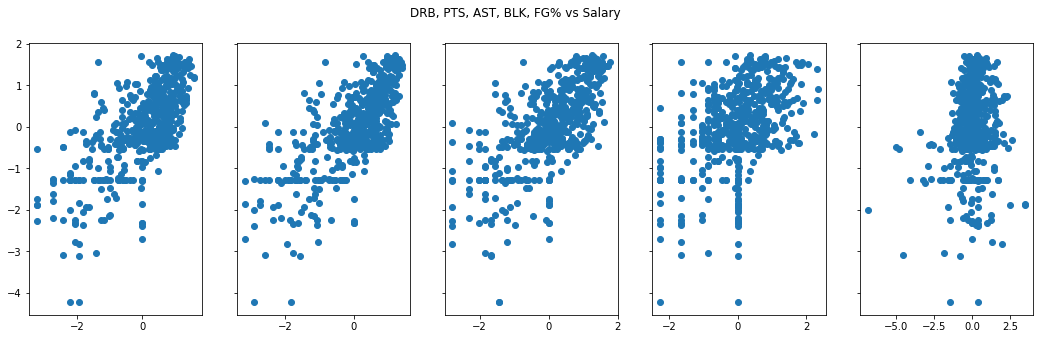

In [113]:
# Check scatter plots for top 5 co-efficients

fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=5, sharey=True)
ax[0].scatter('DRB_log', 'Salary_log', data=df_sal_tot_ite4_log_norm)
ax[1].scatter('PTS_log', 'Salary_log', data=df_sal_tot_ite4_log_norm)
ax[2].scatter('AST_log', 'Salary_log', data=df_sal_tot_ite4_log_norm)
ax[3].scatter('BLK_log', 'Salary_log', data=df_sal_tot_ite4_log_norm)
ax[4].scatter('FG%_log', 'Salary_log', data=df_sal_tot_ite4_log_norm)
plt.suptitle('DRB, PTS, AST, BLK, FG% vs Salary')
plt.savefig("Images/sal_tot.png", bbox_inches='tight')

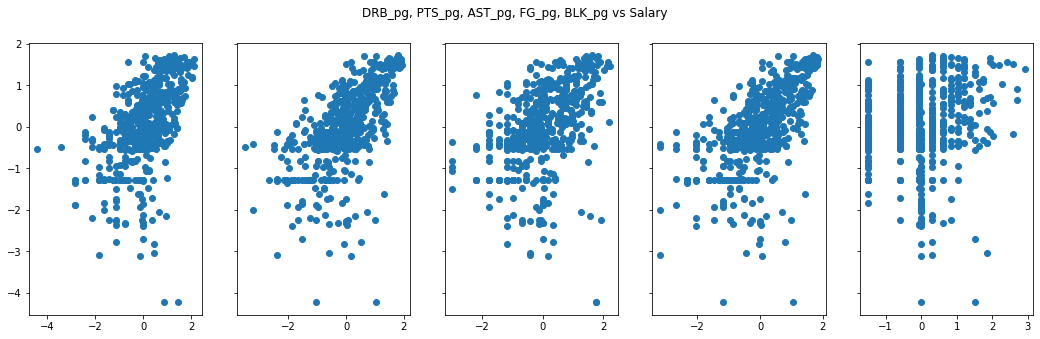

In [114]:
fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=5, sharey=True)
ax[0].scatter('DRB_pg_log', 'Salary_log', data=df_sal_pg_ite4_log_norm)
ax[1].scatter('PTS_pg_log', 'Salary_log', data=df_sal_pg_ite4_log_norm)
ax[2].scatter('AST_pg_log', 'Salary_log', data=df_sal_pg_ite4_log_norm)
ax[3].scatter('FG_pg_log', 'Salary_log', data=df_sal_pg_ite4_log_norm)
ax[4].scatter('BLK_pg_log', 'Salary_log', data=df_sal_pg_ite4_log_norm)
plt.suptitle('DRB_pg, PTS_pg, AST_pg, FG_pg, BLK_pg vs Salary')
plt.savefig("Images/sal_pg.png", bbox_inches='tight')

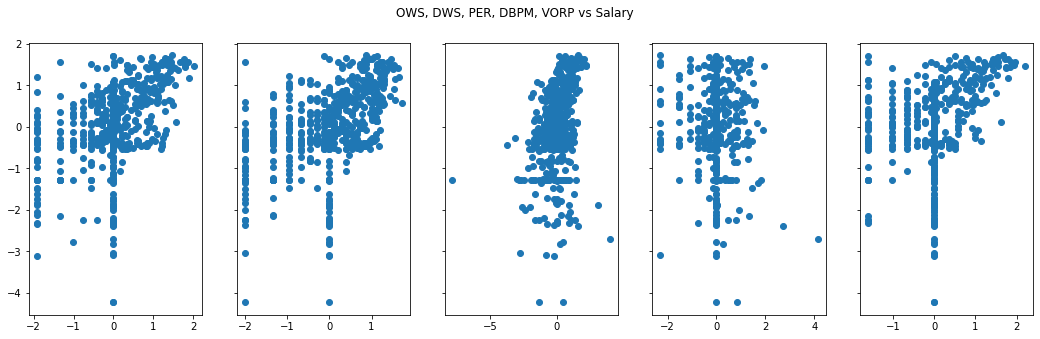

In [115]:
fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=5, sharey=True)
ax[0].scatter('OWS_log', 'Salary_log', data=df_sal_adv_ite4_log_norm)
ax[1].scatter('DWS_log', 'Salary_log', data=df_sal_adv_ite4_log_norm)
ax[2].scatter('PER_log', 'Salary_log', data=df_sal_adv_ite4_log_norm)
ax[3].scatter('DBPM_log', 'Salary_log', data=df_sal_adv_ite4_log_norm)
ax[4].scatter('VORP_log', 'Salary_log', data=df_sal_adv_ite4_log_norm)
plt.suptitle('OWS, DWS, PER, DBPM, VORP vs Salary')
plt.savefig("Images/sal_adv.png", bbox_inches='tight')

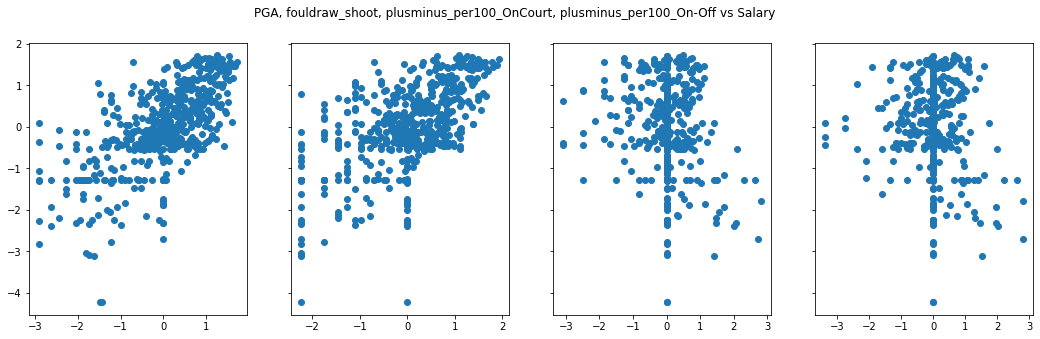

In [116]:
fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=4, sharey=True)
ax[0].scatter('PGA_log', 'Salary_log', data=df_sal_pbp_ite4_log_norm)
ax[1].scatter('fouldraw_Shoot_log', 'Salary_log', data=df_sal_pbp_ite4_log_norm)
ax[2].scatter('plusminus_per100_OnCourt_log', 'Salary_log', data=df_sal_pbp_ite4_log_norm)
ax[3].scatter('plusminus_per100_On-Off_log', 'Salary_log', data=df_sal_pbp_ite4_log_norm)
plt.suptitle('PGA, fouldraw_shoot, plusminus_per100_OnCourt, plusminus_per100_On-Off vs Salary')
plt.savefig("Images/sal_pbp.png", bbox_inches='tight')

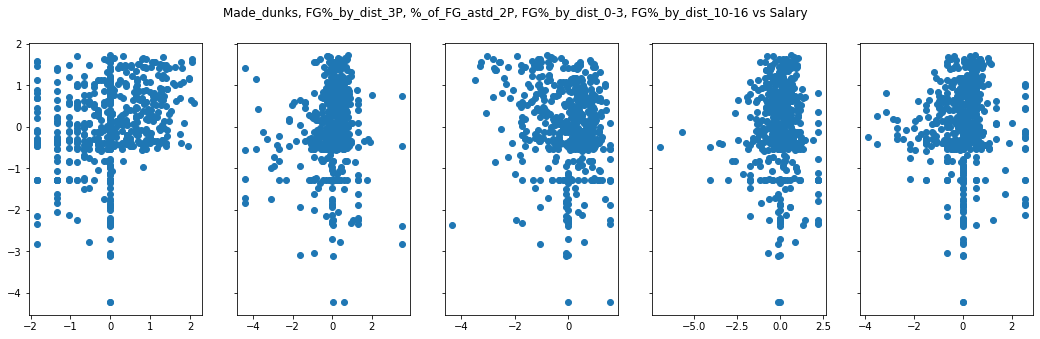

In [117]:
fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=5, sharey=True)
ax[0].scatter('Made_dunks_log', 'Salary_log', data=df_sal_shoot_ite4_log_norm)
ax[1].scatter('FG%_by_dist_3P_log', 'Salary_log', data=df_sal_shoot_ite4_log_norm)
ax[2].scatter('%_of_FG_astd_2P_log', 'Salary_log', data=df_sal_shoot_ite4_log_norm)
ax[3].scatter('FG%_by_dist_0-3_log', 'Salary_log', data=df_sal_shoot_ite4_log_norm)
ax[4].scatter('FG%_by_dist_10-16_log', 'Salary_log', data=df_sal_shoot_ite4_log_norm)
plt.suptitle('Made_dunks, FG%_by_dist_3P, %_of_FG_astd_2P, FG%_by_dist_0-3, FG%_by_dist_10-16 vs Salary')
plt.savefig("Images/sal_shoot.png", bbox_inches='tight')

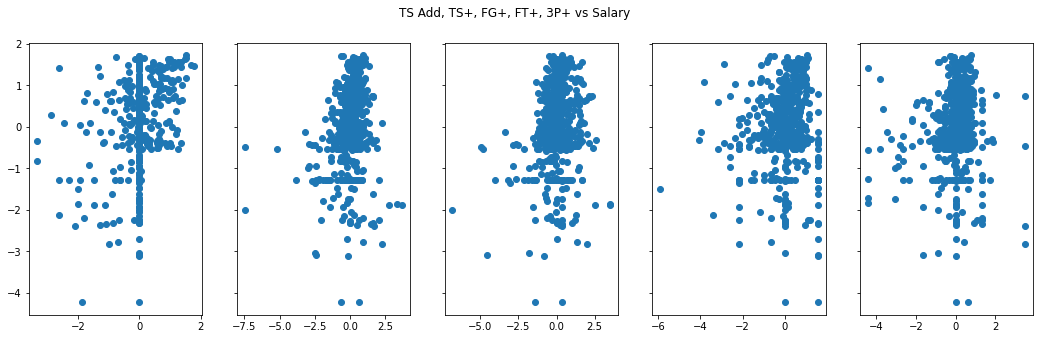

In [118]:
fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=5, sharey=True)
ax[0].scatter('TS Add_log', 'Salary_log', data=df_sal_adjshoot_ite4_log_norm)
ax[1].scatter('TS+_log', 'Salary_log', data=df_sal_adjshoot_ite4_log_norm)
ax[2].scatter('FG+_log', 'Salary_log', data=df_sal_adjshoot_ite4_log_norm)
ax[3].scatter('FT+_log', 'Salary_log', data=df_sal_adjshoot_ite4_log_norm)
ax[4].scatter('3P+_log', 'Salary_log', data=df_sal_adjshoot_ite4_log_norm)
plt.suptitle('TS Add, TS+, FG+, FT+, 3P+ vs Salary')
plt.savefig("Images/sal_adjshoot.png", bbox_inches='tight')

## Evaluation


Based on the counting stats, a player that can get defensive rebounds, score many points or generate many assists. This is very general as any player should work on these parts of the game all the time. What is a more interesting to observation is that offensive rebounds, steals and 2 point shots do not contribute to salary. This is reflective of the current playstyle of the NBA. Offensive rebounds and steals often places individual players out of position on defence which can hurt the overall team defence. 2 point shots, generally from mid-range also places players out of position on offence.

Based on the advanced stats, it is difficult to quantify defence however it was shown here that defence or offence is not more important than each other, as long as the player contributes win shares. This is also supported by the minimal effect that the plus minus stats have. In general, the way a player plays should contribute to wins and that will bring a bigger contract.

For example a player that scores 20 points and their team has a positive win percentage will be perceived as more valuable than a player that scores 25 points per game but their team has a negative win percentage.

The final question is what can a player improve on offensively to secure the next big contract? The shooting advance stats show that True Shooting (TS) is most valuable. In essence, a player that has a high effective field goal percentage (eFG%) AND can get to the free throw line. As the other advanced shooting stats suggest, it is not about how many shots a player attempts but more about making the shot and staying efficient. The player should focus on making shots close to the rim (dunks and layups) and any 3 point shot. If the player is not an effective 3 point shooter, an alternative is being an off ball threat to score 2 points.

## Conclusion

Given the multicollinearity in the models, I suggest a player focus on these aspects to secure an NBA contract:

* Improve 3 point shooting or being an off ball threat
* Use playing time to win the game, not to get individual stats
* Avoid offensive rebounds and steals. Stay within the team offence and defence structure

### Further Improvements

The biggest issue is to resolve the multicollinearity. I would like to investigate how sport statistics manage their data for analysis or investigate other regression models. It was not covered in this course but I would incorporate VIF scores and see the effect on identifying multicollinearity.

I would also expand the rows in the data by including data from previous seasons, as far back as 5 seasons. After transformations, the data from one season would reduce dramatically. A larger data set could balance the variance seen in one season.